# Troubleshooting the UHS4 data
**Author:** Jesse Marks

The UHS4 data had an alarming number of individuals removed due to the IBS filtering. The HWE SNP filter also removed quite a bit more than usual. Here are those stats:

**HA (Post-STRUCTURE N=871)** <br>
HA:= (AFR < 25%) ∧ (EAS >= 8%)
* GCR 10% removed 287,614 SNPs
* GCR 10% removed 43 subjects
* HWE p<0.0001 removed 23,300 (autosomal) SNPs
* IBD/IBS filter removed 312 subjects

**EA**
EA:= (AFR < 25%) ∧ (EAS <= 25%)
* GCR 10% removed 19,303 SNPs
* GCR 10% removed 79 subjects
* HWE p<0.0001 removed 118,936 (autosomal) SNPs
* IBD/IBS filter removed 886 subjects

**AA**
AA:= (AFR < 25%) ∧ (EAS <= 25%)
* GCR 10% removed 118,936 SNPs
* GCR 10% removed 149 subjects
* HWE p<0.0001 removed 252,879 (autosomal) SNPs
* IBD/IBS filter removed 116 subjects

We will try a series of tests to determine if the genotype data are corrupt.
1. HWE p-value distribution plot of whole genome for all three ancestry groups
2. Manhattan plots of those p-values 

___

**Note:** that for the HA subjects we want to use the traditional threshold instead of the 8% threshold we applied to capture more of them. Specifically, we want to use the following thresholds:

| Ancestry | Subject Count | Retainment Thresholds     |
|----------|---------------|---------------------------|
| EA       | 1,650         | (AFR < 25%) ∧ (EAS < 25%) |
| AA       | 1,395         | (AFR > 25%) ∧ (EAS < 25%) |
| HA       | 418           | (AFR < 25%) ∧ (EAS >= 25%) |

## IBS Score (Distance)
Plot the IBS score, or distance, for the AA's and the EA's.<br>
The data that I am using here is output from running the `/shared/bioinformatics/software/R/merge_genome_missing.R`
function with `--type IBS` parameter.

### EA

FID1,IID1,FID2,IID2,RT,EZ,Z0,Z1,Z2,PI_HAT,PHE,DST,PPC,RATIO
AS00-00584_8002022306_HHG10079_12_A07,AS00-00584_8002022306_HHG10079_12_A07,AS00-00619_8002160856_HHG0001_10_G01,AS00-00619_8002160856_HHG0001_10_G01,UN,NA,1,0,0,0,-1,0.896113,0.0071,1.8537
AS00-00584_8002022306_HHG10079_12_A07,AS00-00584_8002022306_HHG10079_12_A07,AS00-00636_8002022330_HHG10081_12_B07,AS00-00636_8002022330_HHG10081_12_B07,UN,NA,1,0,0,0,-1,0.894567,0.0982,1.9214
AS00-00584_8002022306_HHG10079_12_A07,AS00-00584_8002022306_HHG10079_12_A07,AS00-00672_8002022247_HHG10082_11_E10,AS00-00672_8002022247_HHG10082_11_E10,UN,NA,1,0,0,0,-1,0.898468,0.1068,1.9240
AS00-00584_8002022306_HHG10079_12_A07,AS00-00584_8002022306_HHG10079_12_A07,AS00-00675_8002022259_HHG10083_37_D08,AS00-00675_8002022259_HHG10083_37_D08,UN,NA,1,0,0,0,-1,0.897873,0.7672,2.0463
AS00-00584_8002022306_HHG10079_12_A07,AS00-00584_8002022306_HHG10079_12_A07,AS00-01816_8002220311_HHG6186_36_D04,AS00-01816_8002220311_HHG6186_36_D04,UN,NA,1,0,0,0,-1,0.898326,0.1054,1.9237
AS00-00584_8002022306_HHG10079_12_A07,AS00-00584_8002022306_HHG10079_12_A07,AS00-01826_8002022319_HHG10088_14_C07,AS00-01826_8002022319_HHG10088_14_C07,UN,NA,1,0,0,0,-1,0.892674,0.0123,1.8658


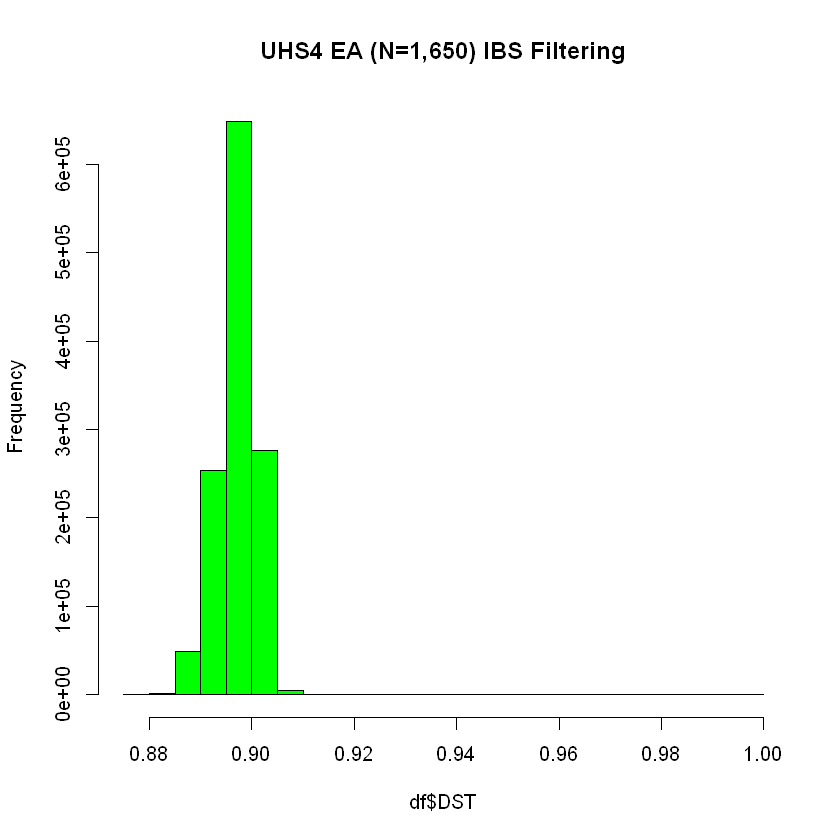

In [2]:
## data copied to local from EC2 ##
setwd("C:/Users/jmarks/OneDrive - Research Triangle Institute/Projects/heroin/ngc/uhs4/qc/troubleshoot/ea")
df <- read.table("genotypes_for_relatedness_ld_prune_filter.genome", header=TRUE)
head(df)

mycol = "green"
title <- "UHS4 EA (N=1,650) IBS Filtering"
hist(df$DST, main = title, col = mycol)

### AA

FID1,IID1,FID2,IID2,RT,EZ,Z0,Z1,Z2,PI_HAT,PHE,DST,PPC,RATIO
AS00-00347_8002022294_HHG10078_12_H06,AS00-00347_8002022294_HHG10078_12_H06,AS00-00351_8002220319_HHG6146_36_C02,AS00-00351_8002220319_HHG6146_36_C02,UN,NA,1,0,0,0,-1,0.837428,0.3999,1.9846
AS00-00347_8002022294_HHG10078_12_H06,AS00-00347_8002022294_HHG10078_12_H06,AS00-00437_8002220343_HHG6150_36_D02,AS00-00437_8002220343_HHG6150_36_D02,UN,NA,1,0,0,0,-1,0.837694,0.2301,1.9558
AS00-00347_8002022294_HHG10078_12_H06,AS00-00347_8002022294_HHG10078_12_H06,AS00-00459_8002220355_HHG6152_36_E02,AS00-00459_8002220355_HHG6152_36_E02,UN,NA,1,0,0,0,-1,0.839655,0.4919,1.9988
AS00-00347_8002022294_HHG10078_12_H06,AS00-00347_8002022294_HHG10078_12_H06,AS00-00583_8002220296_HHG6155_36_F02,AS00-00583_8002220296_HHG6155_36_F02,UN,NA,1,0,0,0,-1,0.838738,0.0007,1.8170
AS00-00347_8002022294_HHG10078_12_H06,AS00-00347_8002022294_HHG10078_12_H06,AS00-00585_8002220308_HHG6156_36_G02,AS00-00585_8002220308_HHG6156_36_G02,UN,NA,1,0,0,0,-1,0.841063,0.0000,1.7724
AS00-00347_8002022294_HHG10078_12_H06,AS00-00347_8002022294_HHG10078_12_H06,AS00-00586_8002694993_HHG0616_1_E01,AS00-00586_8002694993_HHG0616_1_E01,UN,NA,1,0,0,0,-1,0.839356,0.0000,1.7509


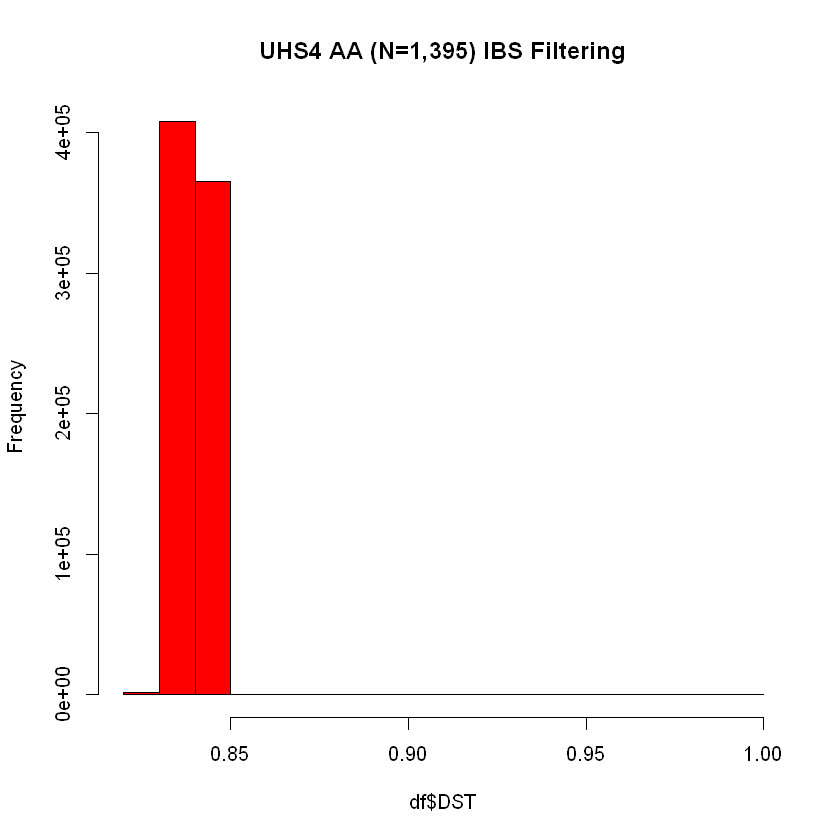

In [3]:
setwd("C:/Users/jmarks/OneDrive - Research Triangle Institute/Projects/heroin/ngc/uhs4/qc/troubleshoot/aa")
df <- read.table("genotypes_for_relatedness_ld_prune_filter.genome", header=TRUE)
head(df)

mycol = "red"
title <- "UHS4 AA (N=1,395) IBS Filtering"
hist(df$DST, main = title, col = mycol)

##  MAF comparison of UHS4 vs 1000G
### EA All (N=1,650)

V1,V2
rs4911642,0.1359
rs114025703,0.0000
rs35416799,0.0594
rs117445191,0.0303
rs2379852,0.0646
rs139847840,0.0778


V1,V2
rs4911642,0.0061810
rs114025703,0.0000000
rs35416799,0.0533600
rs117445191,0.0508400
rs2379852,0.0796200
rs139847840,0.0006098


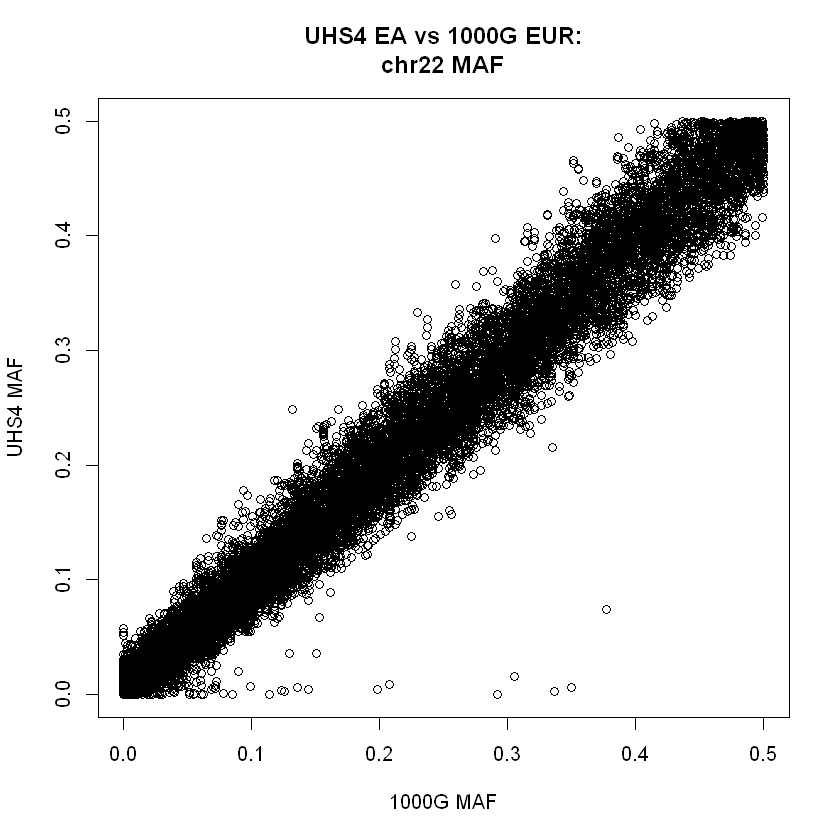

In [21]:
setwd("C:/Users/jmarks/OneDrive - Research Triangle Institute/Projects/heroin/ngc/uhs4/qc/troubleshoot/ea/maf")
df_thou <- read.table("1000g_maf.frq")
df_ea <- read.table("ea_maf.frq")
head(df_thou)
head(df_ea)

plot(df_thou$V2, df_ea$V2, main="UHS4 EA vs 1000G EUR:\nchr22 MAF",
    ylab="UHS4 MAF", xlab="1000G MAF")

### AA all (N=1,395) chr22

In [ ]:
# myaa=/shared/jmarks/heroin/uhs4/genotype/observed/processing/004/troubleshoot/aa
cd /shared/jmarks/heroin/uhs4/genotype/observed/processing/004/troubleshoot/aa

# using these data
"""
ww genotypes_b37_dbsnp138_flipped_structure_variant_missing_lte_0.10_hwe_p_gte_0.0001_filter.{bim,fam}
 1642143 genotypes_b37_dbsnp138_flipped_structure_variant_missing_lte_0.10_hwe_p_gte_0.0001_filter.bim
    1395 genotypes_b37_dbsnp138_flipped_structure_variant_missing_lte_0.10_hwe_p_gte_0.0001_filter.fam
"""

# want to get the overlap of these SNPs and the ones in thou=/shared/data/ref_panels/1000G/2014.10
#================================================================================
python
"""
Get all of the 1000G SNPs with rsIDs and their associated ancestry-of-interest MAF
"""
import gzip

infile = "1000GP_Phase3_chr22.legend.gz"
anc = "AFR"
outfile = "processing/{}.1000G_p3.chr22.rsonly.maf".format(anc)

with gzip.open(infile) as inF, open(outfile, "w") as outF:
    head = inF.readline().split()
    anc_index = head.index(anc)
    head = "{}\t{}\n".format(head[0], head[anc_index])
    outF.write(head)
    
    line = inF.readline()
    while line:
        sl = line.split()
        rsid = sl[0]
        if rsid[0:2] == "rs":
            newline = "{}\t{}\n".format(rsid, sl[anc_index])
            outF.write(newline)
        line = inF.readline()
#================================================================================

## bash ##
anc=aa
# now I want to get the overlap of the SNPs between my study data and 1000G
    grep "rs" $myaa/genotypes_b37_dbsnp138_flipped_structure_variant_missing_lte_0.10_hwe_p_gte_0.0001_filter.bim | \
    awk '{print $2":"$4":"$5":"$6}' | sort -u > $myaa/${anc}_snps.txt


# get overlap between study and 1000G
comm -12 <(cut -f1 $thou/processing/AFR.1000G_p3.chr22.rsonly.maf | sort) $myaa/${anc}_snps.txt \
    > $myaa/overlap.snps.chr22 &
## why are there only 4,281

# prune 1000G MAF file down to those overlap SNPs
awk 'FNR==NR{map[$1]=$1; next} $1 in map {print $0}' $myaa/overlap.snps.chr22 \
    $thou/processing/AFR.1000G_p3.chr22.rsonly.maf > $thou/processing/study_AFR_overlap.1000G_p3.chr22.rsonly.maf


# prune bim file down to those overlap snps and calculate the freq
/shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
    --noweb \
    --memory 2048 \
    --bfile $myaa/genotypes_b37_dbsnp138_flipped_structure_variant_missing_lte_0.10_hwe_p_gte_0.0001_filter \
    --extract <(cut -d ":" -f1 $myaa/overlap.snps.chr22) \
    --freq \
    --out $myaa/$anc.1000g.overlap

# create study MAF file for R
awk '{print $2,$5}' aa.1000g.overlap.frq > $myaa/aa.1000g.overlap.rfile.frq

V1,V2
rs117943072:17021114:G:C,0.001512859
rs7291672:17031494:A:G,0.104387292
rs5746647:17057138:G:T,0.255673222
rs2096537:17094749:A:C,0.320726172
rs9606009:17103078:C:G,0.232980333
rs114537679:17140221:G:C,0.045385779


SNP,MAF
rs117943072,0.004724
rs7291672,0.004071
rs5746647,0.204000
rs2096537,0.261600
rs9606009,0.232100
rs114537679,0.040400


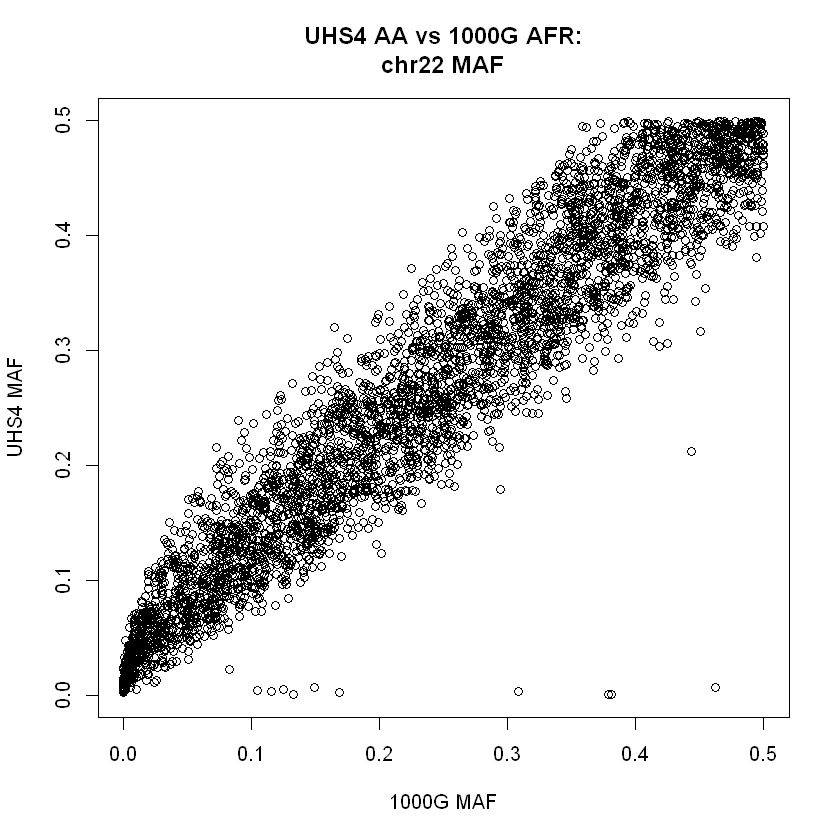

In [31]:
# scp -i ~/.ssh/gwas_rsa ec2-user@34.206.166.72:/shared/jmarks/heroin/uhs4/genotype/observed/processing/004/troubleshoot/aa/aa.1000g.overlap.rfile.frq .
# scp -i ~/.ssh/gwas_rsa ec2-user@34.206.166.72:/shared/data/ref_panels/1000G/2014.10/processing/study_AFR_overlap.1000G_p3.chr22.rsonly.maf .
setwd("C:/Users/jmarks/OneDrive - Research Triangle Institute/Projects/heroin/ngc/uhs4/qc/troubleshoot/aa/maf")
df_thou <- read.table("study_AFR_overlap.1000G_p3.chr22.rsonly.maf", header=F)
df_aa <- read.table("aa.1000g.overlap.rfile.frq", header=T)

these <- which(df_thou$V2 >0.5)
df_thou$V2[these] <- 1 - df_thou$V2[these] 
head(df_thou)
head(df_aa)

plot(df_thou$V2, df_aa$MAF, main="UHS4 AA vs 1000G AFR:\nchr22 MAF",
    ylab="UHS4 MAF", xlab="1000G MAF")

### EA 886 problematic subjects

In [ ]:
myea=/shared/jmarks/heroin/uhs4/genotype/observed/processing/004/troubleshoot/ea
thou=/shared/data/ref_panels/1000G/2014.10

# symlink to post structure files as well as subjects identified for removal during IBS filtering
ln -s $myea/../../ea/autosomes/genotypes_b37_dbsnp138_flipped.{bed,bim,fam} .
ln -s ../../ea/autosomes/genotypes_for_relatedness_ld_prune_ibs_gt_0.9_igraph.remove .

# get counts of post 
ww $myea/*{bim,fam}
"""
 2311600 genotypes_b37_dbsnp138_flipped.bim
    1650 genotypes_b37_dbsnp138_flipped.fam
"""

# filter down to only problematic subjects
/shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
    --noweb \
    --memory 2048 \
    --bfile $myea/genotypes_b37_dbsnp138_flipped \
    --keep genotypes_for_relatedness_ld_prune_ibs_gt_0.9_igraph.remove \
    --freq \
    --chr 22 \
    --make-bed \
    --out $myea/chr22_ea_keep_problematic_n886

## filter down to only non-problematic subjects
#/shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
#    --noweb \
#    --memory 2048 \
#    --bfile $myea/genotypes_b37_dbsnp138_flipped \
#    --remove genotypes_for_relatedness_ld_prune_ibs_gt_0.9_igraph.remove \
#    --freq \
#    --make-bed \
#    --out $myea/uhs4_ea_keep_problematic_n886


# extract 1000G chr22 eur maf
#================================================================================
python
"""
Extract variants that have rsIDs along with their eur maf. 

"""

import gzip

anc = "EUR"
infile = "/shared/data/ref_panels/1000G/2014.10/1000GP_Phase3_chr22.legend.gz"
outfile = "/shared/jmarks/heroin/uhs4/genotype/observed/processing/004/troubleshoot/ea/1000g/1000g_eur_chr22_maf"

with gzip.open(infile) as inF, open(outfile, "w") as outF:
    head = inF.readline()
    head = head.split()
    maf_index = head.index(anc)
    head = "{}\t{}\n".format(head[0], head[maf_index])
    line = inF.readline()
    while line:
        sl = line.split()
        maf = float(sl[maf_index])
        whole_id = sl[0]
        rsid = whole_id.split(":")[0]
        
        if rsid[0:2] == "rs":
            if maf > 0.5:
                maf = 1 - maf
            newline = "{}\t{}\t{}\n".format(rsid, whole_id, maf)
            outF.write(newline)
        line = inF.readline()
#================================================================================
## filter to biallelic variants
cut -f1 $myea/1000g_eur_chr22_maf  | sort | uniq -u > $myea/biallelic_only
awk 'FNR==NR{map[$1]=1; next} $1 in map {print $1,$3} ' \
    $myea/biallelic_only $myea/1000g_eur_chr22_maf > $myea/1000g_eur_chr22_bionly.maf


# get study/1000G overlap
awk 'FNR==NR{map[$1]=$2; next} $2 in map {print $2,$5,map[$2]} FNR==1{print "id\tstudy_maf\tthoug_maf"} ' \
 $myea/1000g/1000g_eur_chr22_bionly.maf $myea/chr22_ea_keep_problematic_n886.frq > \
    $myea/study_1000g_overlap_chr22.frq

# scp from ec2 to local
cd ~/Desktop/Projects/heroin/ngc/uhs4/qc/troubleshoot/ea/maf
scp -i ~/.ssh/gwas_rsa ec2-user@34.206.166.72:/shared/jmarks/heroin/uhs4/genotype/observed/processing/004/troubleshoot/ea/study_1000g_overlap_chr22.frq .

id,study_maf,thoug_maf
rs4911642,0.009158,0.14015905
rs201243271,0.005515,0.00000000
rs5747010,0.362200,0.40656064
rs114025703,0.000000,0.00000000
rs35416799,0.058550,0.06262425
rs117445191,0.047870,0.05566600


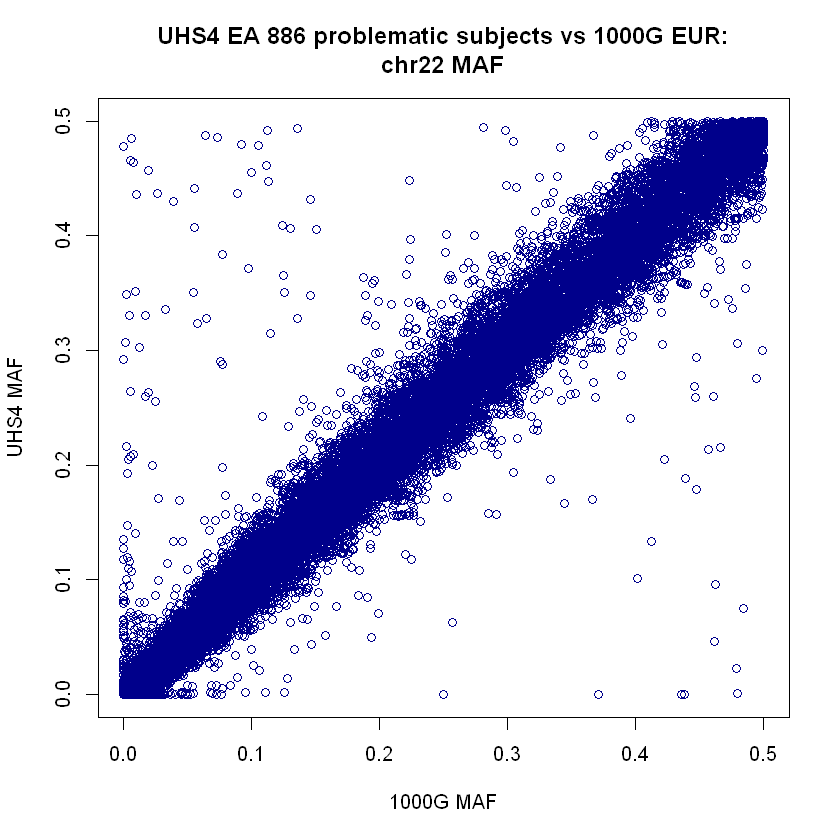

In [8]:
# R #
setwd("C:/Users/jmarks/OneDrive - Research Triangle Institute/Projects/heroin/ngc/uhs4/qc/troubleshoot/ea/maf")
df <- read.table("study_1000g_overlap_chr22.frq", header=T)

head(df)

plot(df$study_maf, df$thoug_maf, main="UHS4 EA 886 problematic subjects vs 1000G EUR:\nchr22 MAF",
    ylab="UHS4 MAF", xlab="1000G MAF", col="dark blue")

### EA 764 non-problematic subjects
These are the subjects that were not deemed problematic during the IBS filtering.

In [ ]:
myea=/shared/jmarks/heroin/uhs4/genotype/observed/processing/004/troubleshoot/ea
thou=/shared/data/ref_panels/1000G/2014.10

# symlink to post structure files as well as subjects identified for removal during IBS filtering
ln -s $myea/../../ea/autosomes/genotypes_b37_dbsnp138_flipped.{bed,bim,fam} .
ln -s ../../ea/autosomes/genotypes_for_relatedness_ld_prune_ibs_gt_0.9_igraph.remove .

# get counts of post 
ww $myea/*{bim,fam}
"""
 2311600 genotypes_b37_dbsnp138_flipped.bim
    1650 genotypes_b37_dbsnp138_flipped.fam
"""

# filter down to only problematic subjects
/shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
    --noweb \
    --memory 2048 \
    --bfile $myea/genotypes_b37_dbsnp138_flipped \
    --remove $myea/genotypes_for_relatedness_ld_prune_ibs_gt_0.9_igraph.remove \
    --freq \
    --chr 22 \
    --make-bed \
    --out $myea/chr22_ea_remove_problematic_n764

# extract 1000G chr22 eur maf
#================================================================================
python
"""
Extract variants that have rsIDs along with their eur maf. 

"""

import gzip

anc = "EUR"
infile = "/shared/data/ref_panels/1000G/2014.10/1000GP_Phase3_chr22.legend.gz"
outfile = "/shared/jmarks/heroin/uhs4/genotype/observed/processing/004/troubleshoot/ea/1000g/1000g_eur_chr22_maf"

with gzip.open(infile) as inF, open(outfile, "w") as outF:
    head = inF.readline()
    head = head.split()
    maf_index = head.index(anc)
    head = "{}\t{}\n".format(head[0], head[maf_index])
    line = inF.readline()
    while line:
        sl = line.split()
        maf = float(sl[maf_index])
        whole_id = sl[0]
        rsid = whole_id.split(":")[0]
        
        if rsid[0:2] == "rs":
            if maf > 0.5:
                maf = 1 - maf
            newline = "{}\t{}\t{}\n".format(rsid, whole_id, maf)
            outF.write(newline)
        line = inF.readline()
#================================================================================
## filter to biallelic variants
cut -f1 $myea/1000g/1000g_eur_chr22_maf  | sort | uniq -u > $myea/1000g/biallelic_only
awk 'FNR==NR{map[$1]=1; next} $1 in map {print $1,$3} ' \
    $myea/1000g/biallelic_only $myea/1000g/1000g_eur_chr22_maf > $myea/1000g/1000g_eur_chr22_bionly.maf


# get study/1000G overlap
awk 'FNR==NR{map[$1]=$2; next} $2 in map {print $2,$5,map[$2]} FNR==1{print "id\tstudy_maf\tthoug_maf"} ' \
 $myea/1000g/1000g_eur_chr22_bionly.maf $myea/chr22_ea_remove_problematic_n764.frq > \
    $myea/study_1000g_overlap_chr22_n764.frq

# scp from ec2 to local
cd ~/Desktop/Projects/heroin/ngc/uhs4/qc/troubleshoot/ea/maf
scp -i ~/.ssh/gwas_rsa ec2-user@34.206.166.72:/shared/jmarks/heroin/uhs4/genotype/observed/processing/004/troubleshoot/ea/study_1000g_overlap_chr22_n764.frq .


id,study_maf,thoug_maf
rs4911642,0.002786,0.14015905
rs201243271,0.015000,0.00000000
rs5747010,0.393400,0.40656064
rs114025703,0.000000,0.00000000
rs35416799,0.047330,0.06262425
rs117445191,0.054380,0.05566600


[1] 30960

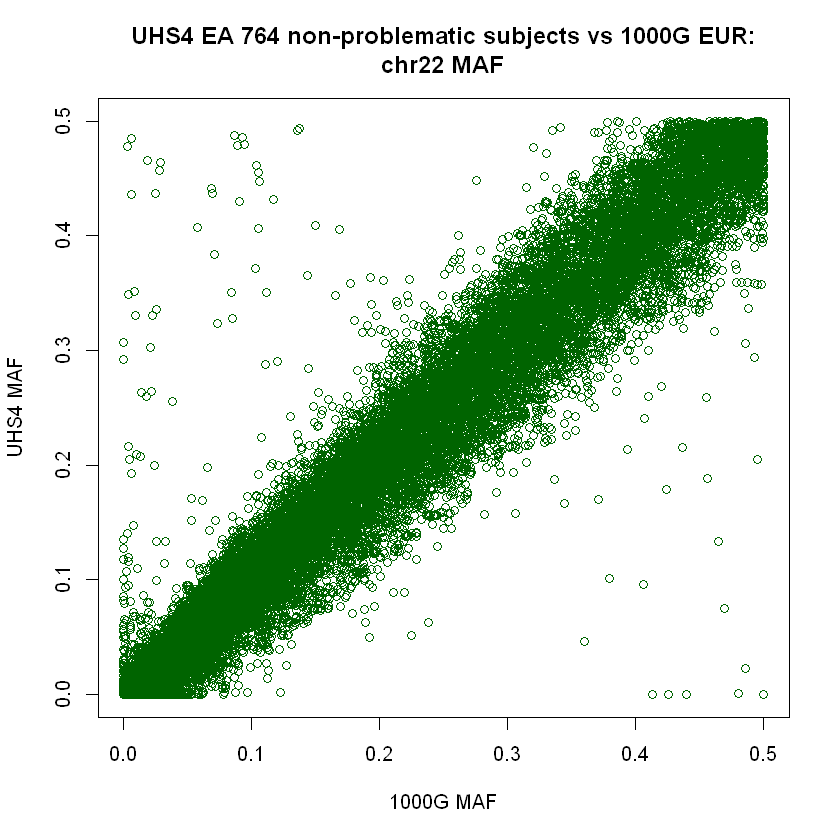

In [7]:
# R #
setwd("C:/Users/jmarks/OneDrive - Research Triangle Institute/Projects/heroin/ngc/uhs4/qc/troubleshoot/ea/maf")
df <- read.table("study_1000g_overlap_chr22_n764.frq", header=T)

head(df)
length(df$study_maf)

plot(df$study_maf, df$thoug_maf, main="UHS4 EA 764 non-problematic subjects vs 1000G EUR:\nchr22 MAF",
    ylab="UHS4 MAF", xlab="1000G MAF", col = "dark green")


### EA problematic vs non-problematic
Where we are defining problemnatics as the subjects that were removed due to IBS filtering and the non-problematic subjects are those that were not removed during the IBS filtering stage.

id,study_maf,thoug_maf
rs4911642,0.002786,0.14015905
rs201243271,0.015000,0.00000000
rs5747010,0.393400,0.40656064
rs114025703,0.000000,0.00000000
rs35416799,0.047330,0.06262425
rs117445191,0.054380,0.05566600


id,study_maf,thoug_maf
rs4911642,0.009158,0.14015905
rs201243271,0.005515,0.00000000
rs5747010,0.362200,0.40656064
rs114025703,0.000000,0.00000000
rs35416799,0.058550,0.06262425
rs117445191,0.047870,0.05566600


[1] 30960

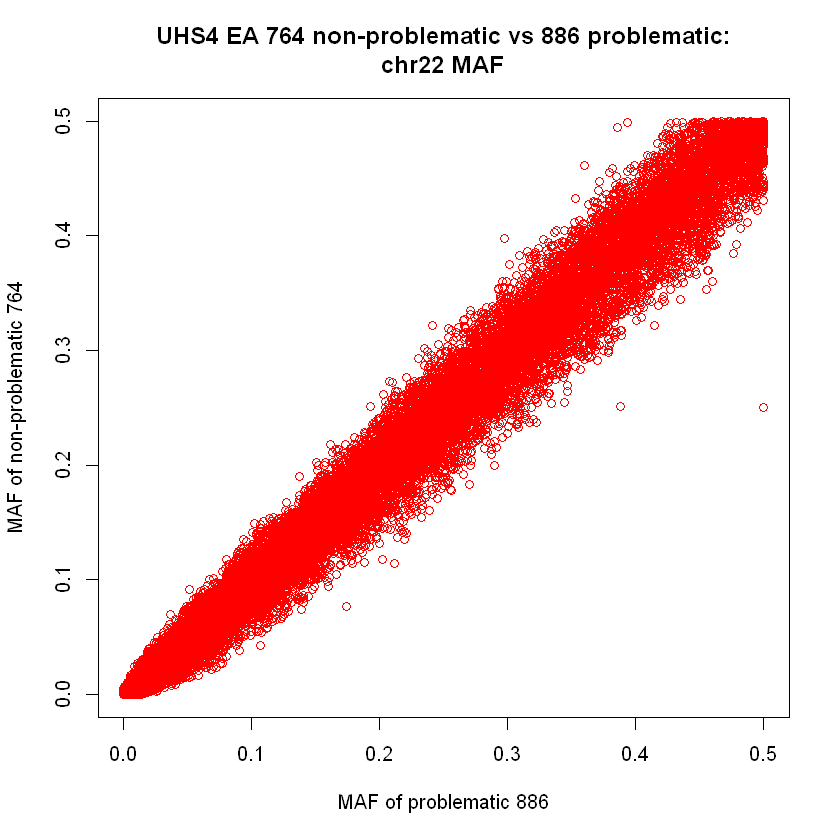

In [6]:
# R #
setwd("C:/Users/jmarks/OneDrive - Research Triangle Institute/Projects/heroin/ngc/uhs4/qc/troubleshoot/ea/maf")
df <- read.table("study_1000g_overlap_chr22_n764.frq", header=T)
df2 <- read.table("study_1000g_overlap_chr22.frq", header=T)

head(df)
head(df2)
length(df$study_maf)

plot(df$study_maf, df2$study_maf, main="UHS4 EA 764 non-problematic vs 886 problematic:\nchr22 MAF",
    ylab="MAF of non-problematic 764", xlab="MAF of problematic 886", col="red")


### UHS2.3

In [ ]:
cd /shared/jmarks/heroin/troubleshooting/uhs23/002
myea=$PWD
thou=/shared/data/ref_panels/1000G/2014.10
aws s3 cp s3://rti-heroin/ngc_uhs2_uhs3_fou/data/genotype/phased/ea/ea_for_phasing.bim.gz .
aws s3 cp s3://rti-heroin/ngc_uhs2_uhs3_fou/data/genotype/phased/ea/ea_for_phasing.bed.gz .
aws s3 cp s3://rti-heroin/ngc_uhs2_uhs3_fou/data/genotype/phased/ea/ea_for_phasing.fam.gz .

gzip -d *

In [ ]:
# get counts of post 
ww $myea/*{bim,fam}
"""
 1494920 /shared/jmarks/heroin/troubleshooting/uhs23/002/ea_for_phasing.bim
     896 /shared/jmarks/heroin/troubleshooting/uhs23/002/ea_for_phasing.fam
"""

# get freq and filter down to only chr22
/shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
    --noweb \
    --memory 2048 \
    --bfile $myea/ea_for_phasing \
    --freq \
    --hardy \
    --chr 22 \
    --out $myea/ea.uhs23.chr22

# extract 1000G chr22 eur maf
#================================================================================
python
"""
Extract variants that have rsIDs along with their eur maf. 

"""

import gzip

anc = "EUR"
infile = "/shared/data/ref_panels/1000G/2014.10/1000GP_Phase3_chr22.legend.gz"
outfile = "/shared/jmarks/heroin/troubleshooting/uhs23/1000g/1000g_eur_chr22_maf"

with gzip.open(infile) as inF, open(outfile, "w") as outF:
    head = inF.readline()
    head = head.split()
    maf_index = head.index(anc)
    head = "{}\t{}\n".format(head[0], head[maf_index])
    line = inF.readline()
    while line:
        sl = line.split()
        maf = float(sl[maf_index])
        whole_id = sl[0]
        rsid = whole_id.split(":")[0]
        
        if rsid[0:2] == "rs":
            if maf > 0.5:
                maf = 1 - maf
            newline = "{}\t{}\t{}\n".format(rsid, whole_id, maf)
            outF.write(newline)
        line = inF.readline()
#================================================================================
### filter to biallelic variants
#cut -f1 $myea/1000g/1000g_eur_chr22_maf  | sort | uniq -u > $myea/1000g/biallelic_only
#awk 'FNR==NR{map[$1]=1; next} $1 in map {print $1,$3} ' \
#    $myea/1000g/biallelic_only $myea/1000g/1000g_eur_chr22_maf > $myea/1000g/1000g_eur_chr22_bionly.maf


# get study/1000G overlap
awk 'FNR==NR{map[$2]=$3; next} $2 in map {print $2,$5,map[$2]} FNR==1{print "id\tstudy_maf\tthoug_maf"} ' \
 $myea/1000g/1000g_eur_chr22_maf $myea/ea.uhs23.chr22.frq > \
    $myea/study_1000g_overlap_chr22.frq

# scp from ec2 to local

id,study_maf,thoug_maf
rs56288446:16456970:G:A,0.00000,0.00000000
rs201243271:16854778:C:T,0.00000,0.00000000
rs5747010:16855618:G:A,0.36820,0.40656064
rs114025703:16863045:T:C,0.00000,0.00000000
rs139847840:17019808:G:A,0.00000,0.09343936
rs117943072:17021114:G:C,0.08408,0.01689861


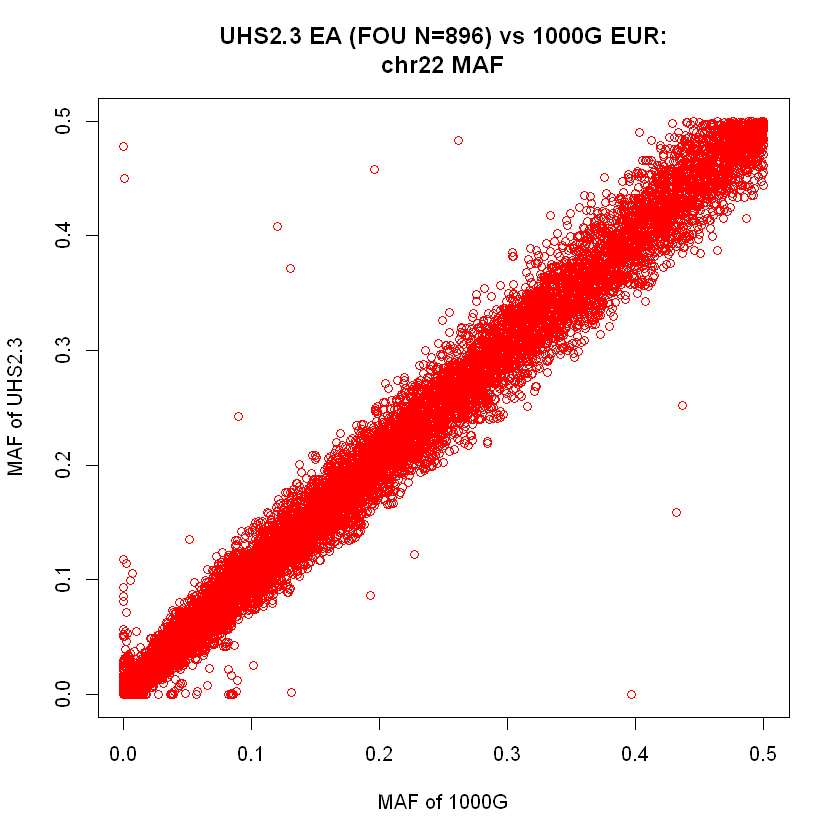

In [18]:
# R #
setwd("C:/Users/jmarks/OneDrive - Research Triangle Institute/Projects/heroin/ngc/uhs4/qc//troubleshoot/uhs23/002")
df <- read.table("study_1000g_overlap_chr22.frq", header=T)

head(df)

plot(df$study_maf, df$thoug_maf, main="UHS2.3 EA (FOU N=896) vs 1000G EUR:\nchr22 MAF",
    ylab="MAF of UHS2.3", xlab="MAF of 1000G", col="red")

# HWE 

## EA 

In [ ]:
## EC2 ##
ancestry=ea
baseD=/shared/jmarks/heroin/uhs4/genotype/observed/processing/004/troubleshoot/hwe/$ancestry
genoD=/shared/jmarks/heroin/uhs4/genotype/observed/processing/004/$ancestry/autosomes

ln -s $genoD/genotypes_b37_dbsnp138_flipped.* $baseD

# get genomewide HWE stats
/shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
    --noweb \
    --memory 2048 \
    --bfile $baseD/genotypes_b37_dbsnp138_flipped \
    --hardy \
    --out $baseD/$ancestry-all

#================================================================================
## local ##
cd /cygdrive/c/Users/jmarks/Desktop/Projects/heroin/ngc/uhs4/qc/troubleshoot/hwe/ea
scp -i ~/.ssh/gwas_rsa ec2-user@34.206.166.72:/shared/jmarks/heroin/uhs4/genotype/observed/processing/004/troubleshoot/hwe/ea/*hwe .

### HWE distribution

In [6]:
## R ##
#"""
# a function to plot the HWE distribution for the UHS4 data
#"""

hwe_hist <- function(df, col, title, ylim=1.08, label_loc=65000){
    options(scipen=5)
    h <- hist(df$P, plot=F) 
    h$density <- round(h$counts/sum(h$counts)*100, 1)
    labs <- paste(round(h$counts/sum(h$counts)*100, 1), "%", sep="")
    plot(h, 
        main = mytitle,
        xlab = "P-value",
        ylab="SNP count",
        ylim=c(0, ylim*max(h$counts)),
        col = col, cex.lab=1.2,
        )
    labs[3:length(labs)-1] <- ""
    text(x = h$mids, y = label_loc+h$counts, labels = labs, cex = 1, srt=90)
}

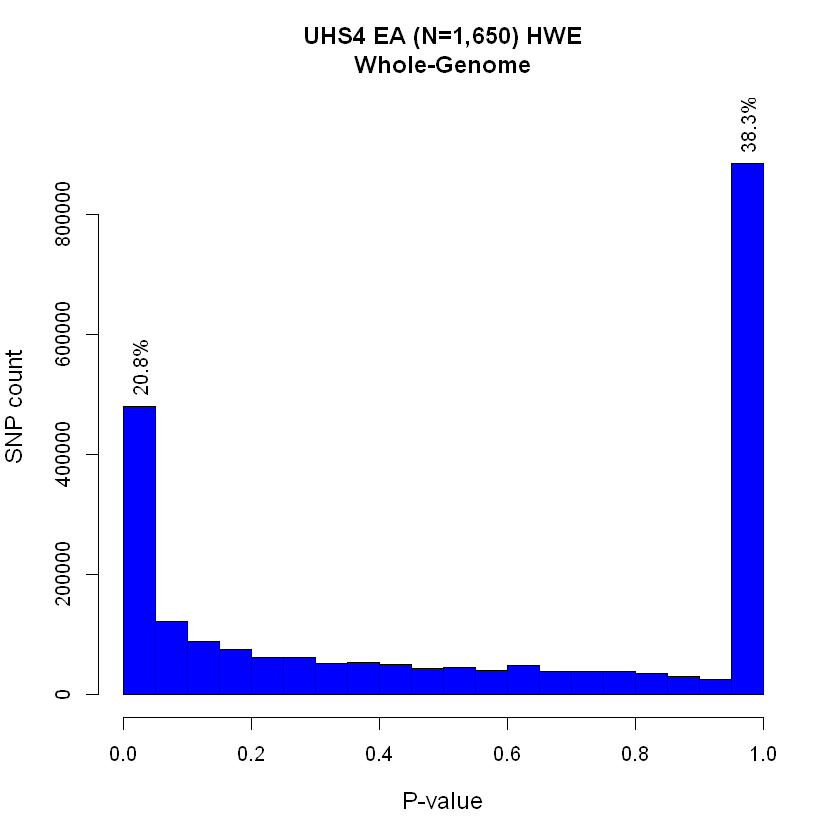

In [94]:
## R ##
setwd("C:/Users/jmarks/OneDrive - Research Triangle Institute/Projects/heroin/ngc/uhs4/qc/troubleshoot/hwe/ea")
#df <- read.table("ea-all.hwe", header=T)
mytitle <- "UHS4 EA (N=1,650) HWE\nWhole-Genome"
hwe_hist(df, col = "blue", title = mytitle)

#### Filters Applied
We want to apply additional filters of MAF < 1% and GCR 10% to the data. See the discussion on [GitHub Issue 117](https://github.com/RTIInternational/bioinformatics/issues/117#issuecomment-480884610). 

In [ ]:
## EC2 ##
ancestry=ea
baseD=/shared/jmarks/heroin/uhs4/genotype/observed/processing/004/troubleshoot/hwe/$ancestry/002
genoD=/shared/jmarks/heroin/uhs4/genotype/observed/processing/004/$ancestry/autosomes

ln -s $genoD/genotypes_b37_dbsnp138_flipped.* $baseD


#================================================================================
# apply filters MAF 1%, GCR 10%, and HWE 0.0001.
/shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
    --noweb \
    --memory 2048 \
    --bfile $baseD/genotypes_b37_dbsnp138_flipped \
    --geno  0.1 \
    --hwe 0.0001 \
    --maf 0.01 \
    --make-bed \
    --out $baseD/$ancestry-all-maf_0.01-gcr_0.1-hwe_0.0001

"""
246846 variants removed due to missing genotype data (--geno).
--hwe: 44918 variants removed due to Hardy-Weinberg exact test.
720152 variants removed due to minor allele threshold(s)
(--maf/--max-maf/--mac/--max-mac).

1299684 variants and 1650 people pass filters and QC.
"""

# apply filters MAF 1% and GCR 10%
/shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
    --noweb \
    --memory 2048 \
    --bfile $baseD/genotypes_b37_dbsnp138_flipped \
    --maf 0.01 \
    --geno  0.1 \
    --make-bed \
    --out $baseD/$ancestry-all-maf_0.01-gcr_0.1

"""
246846 variants removed due to missing genotype data (--geno).
722125 variants removed due to minor allele threshold(s)
(--maf/--max-maf/--mac/--max-mac).

1342629 variants and 1650 people pass filters and QC.
"""
#================================================================================


# get genomewide HWE stats
/shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
    --noweb \
    --memory 2048 \
    --bfile $baseD/$ancestry-all-maf_0.01-gcr_0.1-hwe_0.0001 \
    --hardy \
    --out $baseD/$ancestry-all-maf_0.01-gcr_0.1-hwe_0.0001 \

/shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
    --noweb \
    --memory 2048 \
    --bfile $baseD/$ancestry-all-maf_0.01-gcr_0.1 \
    --hardy \
    --out $baseD/$ancestry-all-maf_0.01-gcr_0.1


#================================================================================
## local ##
cd /cygdrive/c/Users/jmarks/Desktop/Projects/heroin/ngc/uhs4/qc/troubleshoot/hwe/ea
scp -i ~/.ssh/gwas_rsa ec2-user@34.206.166.72:/shared/jmarks/heroin/uhs4/genotype/observed/processing/004/troubleshoot/hwe/ea/002/ea-all-maf_0.01-gcr_0.1-hwe_0.0001.hwe . &
scp -i ~/.ssh/gwas_rsa ec2-user@34.206.166.72:/shared/jmarks/heroin/uhs4/genotype/observed/processing/004/troubleshoot/hwe/ea/002/ea-all-maf_0.01-gcr_0.1.hwe . &


[1] 1342629

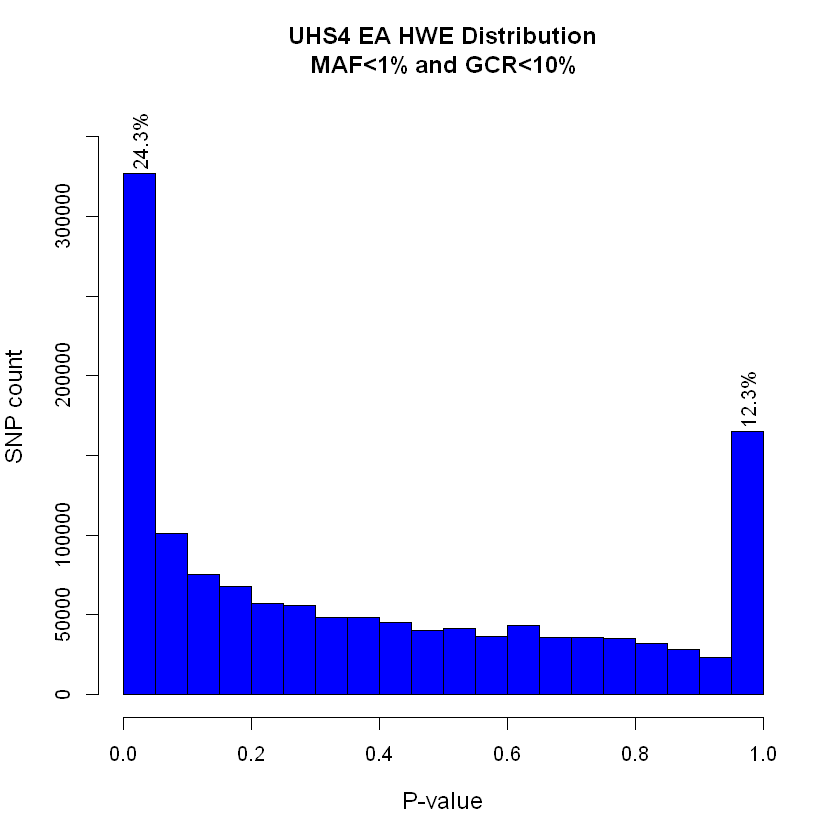

In [23]:
setwd("C:/Users/jmarks/OneDrive - Research Triangle Institute/Projects/heroin/ngc/uhs4/qc/troubleshoot/ea/hwe/")
#df <- read.table("ea-all-maf_0.01-gcr_0.1.hwe", header=T)

length(df$CHR)
mytitle <- "UHS4 EA HWE Distribution\nMAF<1% and GCR<10%"
hwe_hist(df, col = "blue", title = mytitle, ylim=1.1, label_loc = 20000)

[1] 1299684

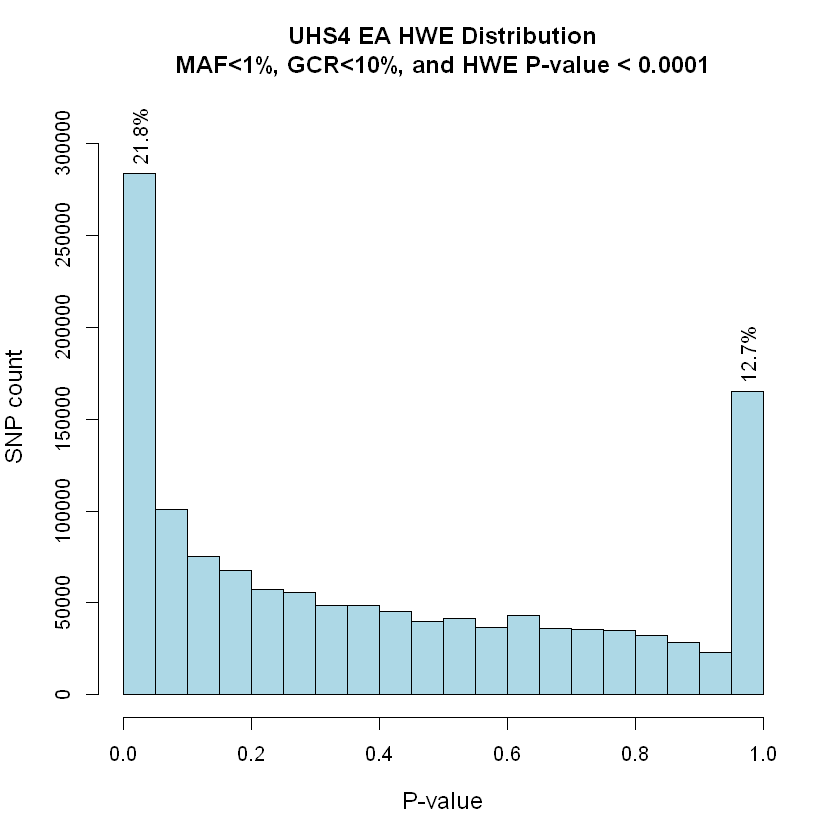

In [25]:
setwd("C:/Users/jmarks/OneDrive - Research Triangle Institute/Projects/heroin/ngc/uhs4/qc/troubleshoot/ea/hwe/")
#df <- read.table("ea-all-maf_0.01-gcr_0.1-hwe_0.0001.hwe", header=T)

length(df$CHR)
mytitle <- "UHS4 EA HWE Distribution\nMAF<1%, GCR<10%, and HWE P-value < 0.0001"
hwe_hist(df, col = "light blue", title = mytitle, ylim=1.1, label_loc = 20000)

### EA Manhattan

In [ ]:
## EC2 ##
ancestry=ea
baseD=/shared/jmarks/heroin/uhs4/genotype/observed/processing/004/troubleshoot/hwe/$ancestry
genoD=/shared/jmarks/heroin/uhs4/genotype/observed/processing/004/$ancestry/autosomes

# make a file that has position data
awk 'FNR==NR{map[$2]=$0;next} $2 in map {print map[$2]"\t"$9} ' $baseD/*bim $baseD/$ancestry-all.hwe > $ancestry-all-with-position.hwe &


outfile=$baseD/$ancestry-hwe.table
    echo -e "VARIANT_ID\tCHR\tPOSITION\tP\tTYPE" > $outfile
    infile=$baseD/$ancestry-all-with-position.hwe
    echo "Processing ${infile}"
    cat ${infile} | \
        perl -lane 'if (($F[4] eq "A" || $F[4] eq "C" || $F[4] eq "G" || $F[4] eq "T") && (($F[5] eq "A" || $F[5] eq "C" || $F[5] eq "G" || $F[5] eq "T"))) {
                        print join("\t",$F[0].":".$F[3],$F[0],$F[3],$F[6],"snp");
                    } else {
                        print join("\t",$F[0].":".$F[3],$F[0],$F[3],$F[6],"indel");
                   }' >> $outfile &

    cat tmp|    perl -lane 'if (($F[4] eq "A" || $F[4] eq "C" || $F[4] eq "G" || $F[5] eq "T") && (($F[5] eq "A" || $F[5] eq "C" || $F[5] eq "G" || $F[5] eq "T"))) {
                        print join("\t",$F[0].":".$F[3],$F[0],$F[3],$F[6],"snp");
                    } else {
                        print $F[4]."\n".$F[5];
                        print join("\t",$F[0].":".$F[3],$F[0],$F[3],$F[6],"indel");}'


# Make Q-Q and manhattan plots
# Plot all chromosomes
/shared/bioinformatics/software/scripts/qsub_job.sh \
    --job_name gwas_plots_${ancestry} \
    --script_prefix $baseD/$ancestry.hwe.plot \
    --mem 20 \
    --nslots 7 \
    --priority 0 \
    --program Rscript /shared/bioinformatics/software/R/generate_gwas_plots.R \
        --in $baseD/${ancestry}-hwe.table \
        --in_chromosomes autosomal_nonPAR \
        --in_header \
        --out $baseD/hwe.plot.all_chr \
        --col_id VARIANT_ID \
        --col_chromosome CHR \
        --col_position POSITION \
        --col_p P \
        --col_variant_type TYPE \
        --generate_snp_indel_manhattan_plot \
        --manhattan_odd_chr_color red3 \
        --manhattan_even_chr_color dodgerblue3 \
        --manhattan_points_cex 1.5 \
        --generate_snp_indel_qq_plot \
        --qq_lines \
        --qq_points_bg black \
        --qq_lambda

####  MAF Filters applied
MAF < 1% applied

In [ ]:
## EC2 ##
ancestry=ea
baseD=/shared/jmarks/heroin/uhs4/genotype/observed/processing/004/troubleshoot/hwe/$ancestry/filters/002
genoD=/shared/jmarks/heroin/uhs4/genotype/observed/processing/004/$ancestry/autosomes


# Filter genotype data by MAF and HWE filters
ln -s $genoD/genotypes_b37_dbsnp138_flipped.{bed,bim,fam} $baseD/

/shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
    --noweb \
    --memory 2048 \
    --bfile $baseD/genotypes_b37_dbsnp138_flipped \
    --maf 0.01 \
    --make-bed \
    --out $baseD/$ancestry-maf-hwe-filtered
"""
733615 variants removed due to minor allele threshold(s)
(--maf/--max-maf/--mac/--max-mac).
1577985 variants and 1650 people pass filters and QC.
"""

/shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
    --noweb \
    --memory 2048 \
    --bfile $baseD/$ancestry-maf-hwe-filtered \
    --hardy \
    --out $baseD/$ancestry-maf-hwe-filtered

# make a file that has position data
awk 'FNR==NR{map[$2]=$0;next} $2 in map {print map[$2]"\t"$9} ' \
    $baseD/$ancestry-maf-hwe-filtered.bim $baseD/$ancestry-maf-hwe-filtered.hwe >\
    $ancestry-all-with-position.hwe 


outfile=$baseD/$ancestry-hwe.table
    echo -e "VARIANT_ID\tCHR\tPOSITION\tP\tTYPE" > $outfile
    infile=$baseD/$ancestry-all-with-position.hwe
    echo "Processing ${infile}"
    cat ${infile} | \
        perl -lane 'if (($F[4] eq "A" || $F[4] eq "C" || $F[4] eq "G" || $F[4] eq "T") && (($F[5] eq "A" || $F[5] eq "C" || $F[5] eq "G" || $F[5] eq "T"))) {
                        print join("\t",$F[0].":".$F[3],$F[0],$F[3],$F[6],"snp");
                    } else {
                        print join("\t",$F[0].":".$F[3],$F[0],$F[3],$F[6],"indel");
                   }' >> $outfile 


# Make Q-Q and manhattan plots
# Plot all chromosomes
/shared/bioinformatics/software/scripts/qsub_job.sh \
    --job_name gwas_plots_${ancestry} \
    --script_prefix $baseD/$ancestry.hwe.plot \
    --mem 20 \
    --nslots 7 \
    --priority 0 \
    --program Rscript /shared/bioinformatics/software/R/generate_gwas_plots.R \
        --in $baseD/${ancestry}-hwe.table \
        --in_chromosomes autosomal_nonPAR \
        --in_header \
        --out $baseD/hwe.plot.all_chr \
        --col_id VARIANT_ID \
        --col_chromosome CHR \
        --col_position POSITION \
        --col_p P \
        --col_variant_type TYPE \
        --generate_snp_indel_manhattan_plot \
        --manhattan_odd_chr_color red3 \
        --manhattan_even_chr_color dodgerblue3 \
        --manhattan_points_cex 1.5 \
        --generate_snp_indel_qq_plot \
        --qq_lines \
        --qq_points_bg black \
        --qq_lambda

## AA 
### HWE Distribution

In [ ]:
## EC2 ##
ancestry=aa
baseD=/shared/jmarks/heroin/uhs4/genotype/observed/processing/004/troubleshoot/hwe/$ancestry
genoD=/shared/jmarks/heroin/uhs4/genotype/observed/processing/004/$ancestry/autosomes

ln -s $genoD/genotypes_b37_dbsnp138_flipped.* $baseD

# get genomewide HWE stats
/shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
    --noweb \
    --memory 2048 \
    --bfile $baseD/genotypes_b37_dbsnp138_flipped \
    --hardy \
    --out $baseD/$ancestry-all

#================================================================================
## local ##
cd /cygdrive/c/Users/jmarks/Desktop/Projects/heroin/ngc/uhs4/qc/troubleshoot/hwe/aa
scp -i ~/.ssh/gwas_rsa ec2-user@34.206.166.72:/shared/jmarks/heroin/uhs4/genotype/observed/processing/004/troubleshoot/hwe/aa/*hwe .

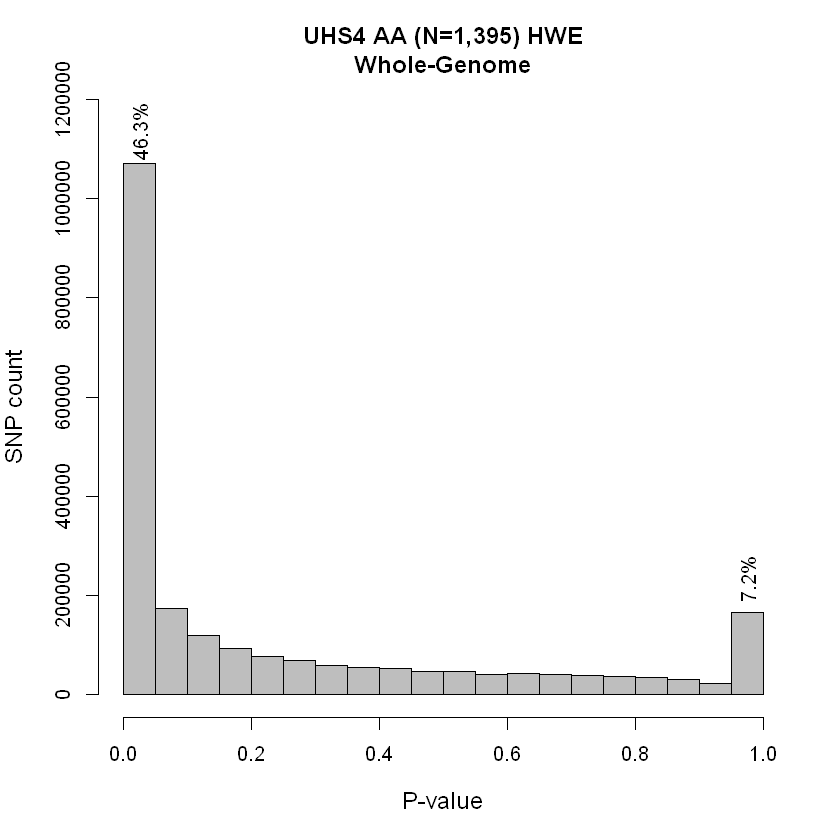

In [80]:
## R ##
setwd("C:/Users/jmarks/OneDrive - Research Triangle Institute/Projects/heroin/ngc/uhs4/qc/troubleshoot/hwe/aa")
aadf <- read.table("aa-all.hwe", header=T)
mycol="grey"
mytitle <- "UHS4 AA (N=1,395) HWE\nWhole-Genome"


hwe_hist(aadf, mycol, mytitle)

#### Filters applied
We want to apply additional filters of MAF < 1% and GCR 10% to the data. See the discussion on [GitHub Issue 117](https://github.com/RTIInternational/bioinformatics/issues/117#issuecomment-480884610). 

In [ ]:
## EC2 ##
ancestry=aa
baseD=/shared/jmarks/heroin/uhs4/genotype/observed/processing/004/troubleshoot/hwe/$ancestry/002
genoD=/shared/jmarks/heroin/uhs4/genotype/observed/processing/004/$ancestry/autosomes

ln -s $genoD/genotypes_b37_dbsnp138_flipped.* $baseD


#================================================================================
# apply filters MAF 1%, GCR 10%, and HWE 0.0001.
/shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
    --noweb \
    --memory 2048 \
    --bfile $baseD/genotypes_b37_dbsnp138_flipped \
    --geno  0.1 \
    --hwe 0.0001 \
    --maf 0.01 \
    --make-bed \
    --out $baseD/$ancestry-all-maf_0.01-gcr_0.1-hwe_0.0001

"""
416578 variants removed due to missing genotype data (--geno).
--hwe: 252879 variants removed due to Hardy-Weinberg exact test.
104406 variants removed due to minor allele threshold(s)
(--maf/--max-maf/--mac/--max-mac).

1537737 variants and 1395 people pass filters and QC.
"""

# apply filters MAF 1% and GCR 10%
/shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
    --noweb \
    --memory 2048 \
    --bfile $baseD/genotypes_b37_dbsnp138_flipped \
    --maf 0.01 \
    --geno  0.1 \
    --make-bed \
    --out $baseD/$ancestry-all-maf_0.01-gcr_0.1

"""
416578 variants removed due to missing genotype data (--geno).
198852 variants removed due to minor allele threshold(s)
(--maf/--max-maf/--mac/--max-mac).
1696170 variants and 1395 people pass filters and QC.
"""
#================================================================================


# get genomewide HWE stats
/shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
    --noweb \
    --memory 2048 \
    --bfile $baseD/$ancestry-all-maf_0.01-gcr_0.1-hwe_0.0001 \
    --hardy \
    --out $baseD/$ancestry-all-maf_0.01-gcr_0.1-hwe_0.0001 \

/shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
    --noweb \
    --memory 2048 \
    --bfile $baseD/$ancestry-all-maf_0.01-gcr_0.1 \
    --hardy \
    --out $baseD/$ancestry-all-maf_0.01-gcr_0.1


#================================================================================
## local ##
cd /cygdrive/c/Users/jmarks/Desktop/Projects/heroin/ngc/uhs4/qc/troubleshoot/hwe/aa
scp -i ~/.ssh/gwas_rsa ec2-user@34.206.166.72:/shared/jmarks/heroin/uhs4/genotype/observed/processing/004/troubleshoot/hwe/aa/002/aa-all-maf_0.01-gcr_0.1-hwe_0.0001.hwe . &
scp -i ~/.ssh/gwas_rsa ec2-user@34.206.166.72:/shared/jmarks/heroin/uhs4/genotype/observed/processing/004/troubleshoot/hwe/aa/002/aa-all-maf_0.01-gcr_0.1.hwe . &


[1] 1696170

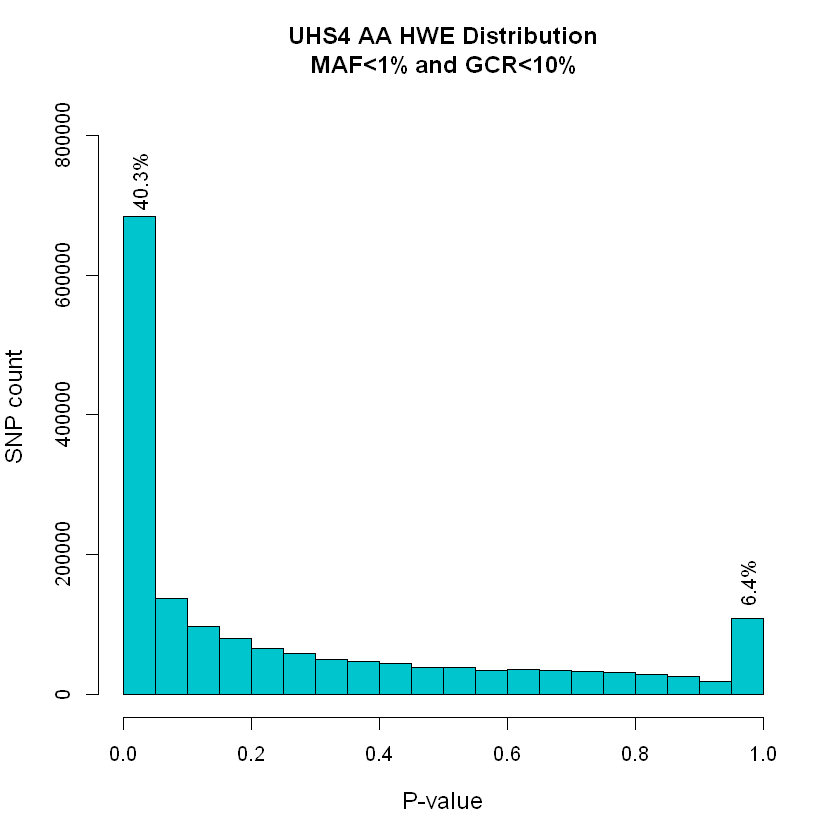

In [69]:
setwd("C:/Users/jmarks/OneDrive - Research Triangle Institute/Projects/heroin/ngc/uhs4/qc/troubleshoot/aa/hwe/")
#df <- read.table("aa-all-maf_0.01-gcr_0.1.hwe", header=T)

length(df$CHR)
mytitle <- "UHS4 AA HWE Distribution\nMAF<1% and GCR<10%"
hwe_hist(df, col = "turquoise3", title = mytitle, ylim=1.2, label_loc = 50000)

[1] 1537737

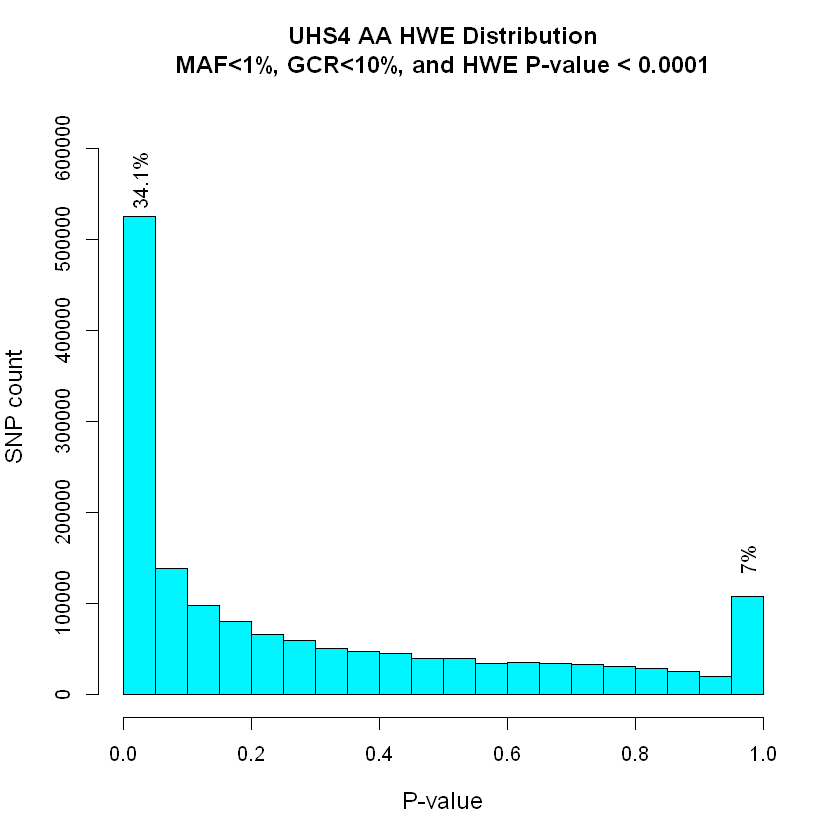

In [75]:
setwd("C:/Users/jmarks/OneDrive - Research Triangle Institute/Projects/heroin/ngc/uhs4/qc/troubleshoot/aa/hwe/")
#df <- read.table("aa-all-maf_0.01-gcr_0.1-hwe_0.0001.hwe", header=T)

length(df$CHR)
mytitle <- "UHS4 AA HWE Distribution\nMAF<1%, GCR<10%, and HWE P-value < 0.0001"
hwe_hist(df, col = "turquoise1", title = mytitle, ylim=1.2, label_loc = 40000)

### AA Manhattan

In [ ]:
ancestry=aa
baseD=/shared/jmarks/heroin/uhs4/genotype/observed/processing/004/troubleshoot/hwe/$ancestry
genoD=/shared/jmarks/heroin/uhs4/genotype/observed/processing/004/$ancestry/autosomes

# make a file that has position data
awk 'FNR==NR{map[$2]=$0;next} $2 in map {print map[$2]"\t"$9} ' \
    $baseD/*bim $baseD/$ancestry-all.hwe > $ancestry-all-with-position.hwe &

outfile=$baseD/$ancestry-hwe.table
    echo -e "VARIANT_ID\tCHR\tPOSITION\tP\tTYPE" > $outfile
    infile=$baseD/$ancestry-all-with-position.hwe
    echo "Processing ${infile}"
    cat ${infile} | \
        perl -lane 'if (($F[4] eq "A" || $F[4] eq "C" || $F[4] eq "G" || $F[4] eq "T") && (($F[5] eq "A" || $F[5] eq "C" || $F[5] eq "G" || $F[5] eq "T"))) {
                        print join("\t",$F[0].":".$F[3],$F[0],$F[3],$F[6],"snp");
                    } else {
                        print join("\t",$F[0].":".$F[3],$F[0],$F[3],$F[6],"indel");
                   }' >> $outfile &

# Make Q-Q and manhattan plots
# Plot all chromosomes
/shared/bioinformatics/software/scripts/qsub_job.sh \
    --job_name gwas_plots_${ancestry} \
    --script_prefix $baseD/$ancestry.hwe.plot \
    --mem 20 \
    --nslots 7 \
    --priority 0 \
    --program Rscript /shared/bioinformatics/software/R/generate_gwas_plots.R \
        --in $baseD/${ancestry}-hwe.table \
        --in_chromosomes autosomal_nonPAR \
        --in_header \
        --out $baseD/hwe.plot.all_chr \
        --col_id VARIANT_ID \
        --col_chromosome CHR \
        --col_position POSITION \
        --col_p P \
        --col_variant_type TYPE \
        --generate_snp_indel_manhattan_plot \
        --manhattan_odd_chr_color red3 \
        --manhattan_even_chr_color dodgerblue3 \
        --manhattan_points_cex 1.5 \
        --generate_snp_indel_qq_plot \
        --qq_lines \
        --qq_points_bg black \
        --qq_lambda


####  Filters applied

In [ ]:
## EC2 ##
ancestry=aa
baseD=/shared/jmarks/heroin/uhs4/genotype/observed/processing/004/troubleshoot/hwe/$ancestry/filters/002
genoD=/shared/jmarks/heroin/uhs4/genotype/observed/processing/004/$ancestry/autosomes


# Filter genotype data by MAF and HWE filters
ln -s $genoD/genotypes_b37_dbsnp138_flipped.{bed,bim,fam} $baseD/

/shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
    --noweb \
    --memory 2048 \
    --bfile $baseD/genotypes_b37_dbsnp138_flipped \
    --maf 0.01 \
    --make-bed \
    --out $baseD/$ancestry-maf-hwe-filtered
"""
202538 variants removed due to minor allele threshold(s)
(--maf/--max-maf/--mac/--max-mac).
2109062 variants and 1395 people pass filters and QC.
"""

/shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
    --noweb \
    --memory 2048 \
    --bfile $baseD/$ancestry-maf-hwe-filtered \
    --hardy \
    --out $baseD/$ancestry-maf-hwe-filtered

# make a file that has position data
awk 'FNR==NR{map[$2]=$0;next} $2 in map {print map[$2]"\t"$9} ' \
    $baseD/$ancestry-maf-hwe-filtered.bim $baseD/$ancestry-maf-hwe-filtered.hwe >\
    $ancestry-all-with-position.hwe 


outfile=$baseD/$ancestry-hwe.table
    echo -e "VARIANT_ID\tCHR\tPOSITION\tP\tTYPE" > $outfile
    infile=$baseD/$ancestry-all-with-position.hwe
    echo "Processing ${infile}"
    cat ${infile} | \
        perl -lane 'if (($F[4] eq "A" || $F[4] eq "C" || $F[4] eq "G" || $F[4] eq "T") && (($F[5] eq "A" || $F[5] eq "C" || $F[5] eq "G" || $F[5] eq "T"))) {
                        print join("\t",$F[0].":".$F[3],$F[0],$F[3],$F[6],"snp");
                    } else {
                        print join("\t",$F[0].":".$F[3],$F[0],$F[3],$F[6],"indel");
                   }' >> $outfile &


# Make Q-Q and manhattan plots
# Plot all chromosomes
/shared/bioinformatics/software/scripts/qsub_job.sh \
    --job_name gwas_plots_${ancestry} \
    --script_prefix $baseD/$ancestry.hwe.plot \
    --mem 20 \
    --nslots 7 \
    --priority 0 \
    --program Rscript /shared/bioinformatics/software/R/generate_gwas_plots.R \
        --in $baseD/${ancestry}-hwe.table \
        --in_chromosomes autosomal_nonPAR \
        --in_header \
        --out $baseD/hwe.plot.all_chr \
        --col_id VARIANT_ID \
        --col_chromosome CHR \
        --col_position POSITION \
        --col_p P \
        --col_variant_type TYPE \
        --generate_snp_indel_manhattan_plot \
        --manhattan_odd_chr_color red3 \
        --manhattan_even_chr_color dodgerblue3 \
        --manhattan_points_cex 1.5 \
        --generate_snp_indel_qq_plot \
        --qq_lines \
        --qq_points_bg black \
        --qq_lambda

## HA
To get the HWE distribution plots for the HA group we need to first create the PLINK filtered data sets based on the STRUCTURE analysis.

We want the HA subjects that we categorized by the STRUCTURE analysis when the traditional thresholds of:

Subject Count|	Retainment Thresholds|
--|--|
418 |	(AFR < 25%) ∧ (EAS >= 25%) |

### data processing

In [ ]:
baseD=/shared/jmarks/heroin/uhs4/genotype/observed/processing/005
cd $baseD

# copy data from earlier processing step
ln -s /shared/jmarks/heroin/uhs4/genotype/observed/processing/002/prestructure .

# copy STRUCTURE analysis files used to filter and make triangle plots with
cp /shared/jmarks/heroin/uhs4/genotype/observed/processing/002/structure/triangle_plots/afr* 
    ./structure/triangle_plots

#### AFR, EAS, and EUR (order matters)####

# Generate triangle plot
Rscript /shared/bioinformatics/software/R/triangle_plot.R \
    --data $baseD/structure/triangle_plots/afr_eas_eur.triangle_input \
    --prefix $baseD/structure/triangle_plots/afr_eas_eur \
    --cluster1 African \
    --cluster2 Asian \
    --cluster3 European \
    --xref $baseD/structure/triangle_plots/afr_eas_eur_id_xref

## local ##
scp -i ~/.ssh/gwas_rsa ec2-user@34.206.166.72:/shared/jmarks/heroin/uhs4/genotype/observed/processing/005/structure/triangle_plots/*g .

**Unfiltered**
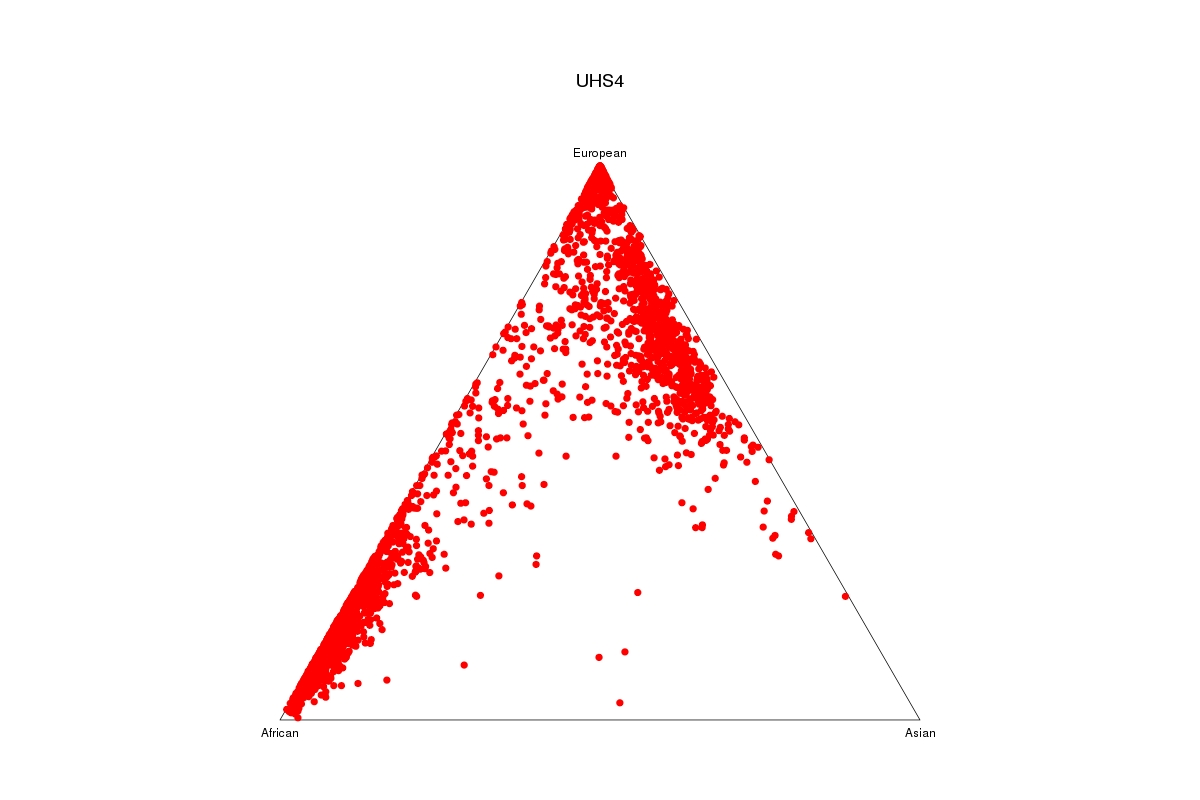

##### Reassigning and removing outliers
The following retainment thresholds should be implemented:


| Action Description | Thresholding Criteria      |
|--------------------|----------------------------|
| For HA retainment | (AFR < 25%)$ \wedge $(EAS >= 25%) |

In [ ]:
## EC2 command line
### get details on which subjects are reassigned ###

ha_thresh=0.25
plots=$baseD/structure/triangle_plots/filter

mkdir $plots
cp $baseD/structure/triangle_plots/afr_eas_eur.triangle_input $plots/
head -1 $baseD/structure/triangle_plots/afr_eas_eur.triangle_input > \
    $plots/afr_eas_eur_filtered.triangle_input

# HA retained
#================================================================================  
# Create triangle plot input with potential outliers filtered
eth=HA


tail -n +2 $plots/afr_eas_eur.triangle_input |\
    perl -slane 'if (($F[3] < 0.25 && $F[4] >= $th)) { print $_; }' -- -th=$ha_thresh \
    > $plots/ha_filtered
awk -v study="$study" -v eth="$eth" 'BEGIN{OFS="\t"} {$3=study "_" eth;print $0}' \
    $plots/ha_filtered >> $plots/afr_eas_eur_filtered.triangle_input
--------------------------------------------------------------------------------

## subjects not assigned to any ancestry group
#cat $plots/*filtered | sort > $plots/all.assigned
#comm -13 $plots/all.assigned <(tail -n +2 $plots/../afr_eas_eur.triangle_input)  >\
#    $plots/not.assigned
##head -1 $plots/afr_eas_eur_filtered.triangle_input > $plots/not.assigned.triangle_input 
##cat $plots/not.assigned >> $plots/not.assigned.triangle_input

#_______________________________________________________________________________________________________________________________________________________
# Generate triangle plot
Rscript /shared/bioinformatics/software/R/triangle_plot.R \
    --data $plots/afr_eas_eur_filtered.triangle_input \
    --prefix $plots/afr_eas_eur_filtered \
    --cluster1 African \
    --cluster2 Asian \
    --cluster3 European \
    --xref $baseD/structure/triangle_plots/afr_eas_eur_id_xref


**filtered**
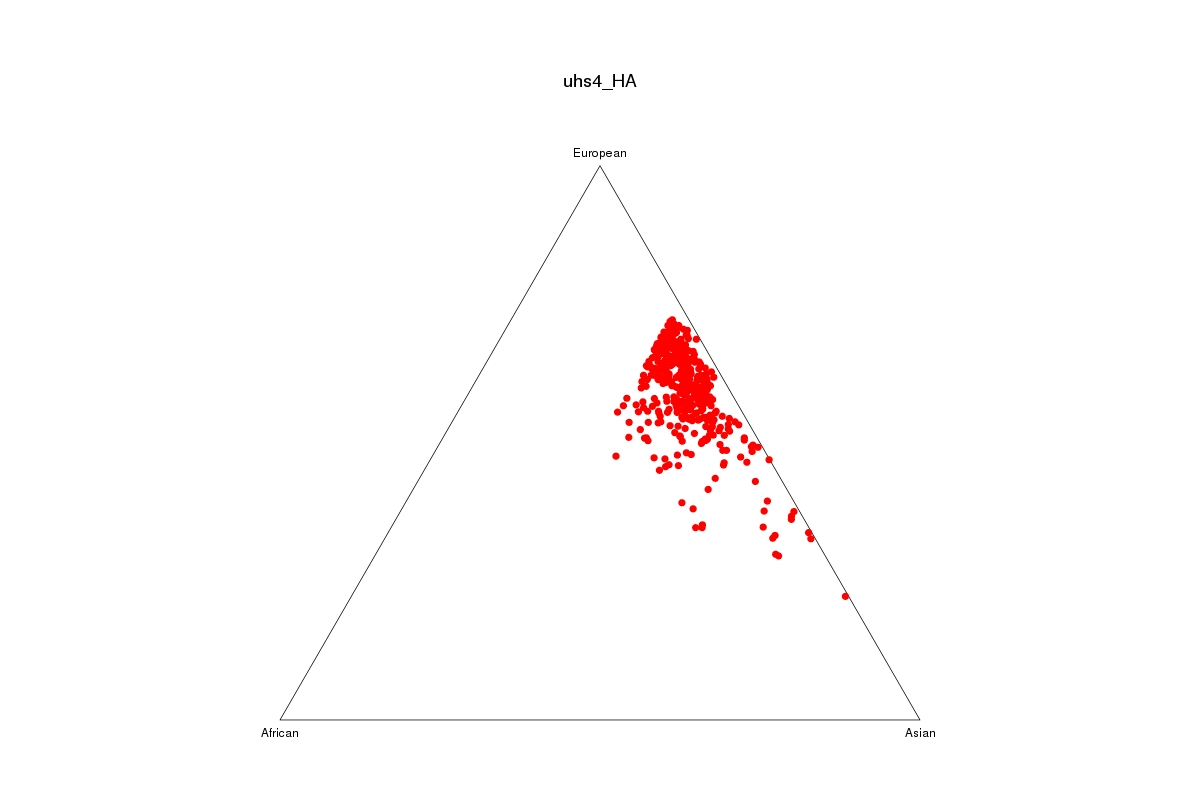

In [ ]:
anlist="ha"

# get ancestry counts after filtering + create a keepIDs list
for an in $anlist;do
    mkdir -p $baseD/$an/{autosomes,chrX}
    awk -v an="${an^^}" -v study="$study" '$3==study"_"an {print $2}' \
        $plots/afr_eas_eur_filtered_for_filtering.txt > $baseD/$an/subject_ids.keep
    wc -l $baseD/$an/subject_ids.keep
done
"""
418 /shared/jmarks/heroin/uhs4/genotype/observed/processing/005/ha/subject_ids.keep
"""

# split famID_IID up by tab --> famID"\t"IID
for an in $anlist;do
    while read line;do
        half=$(expr ${#line} / 2)
        echo ${line:0:$half} ${line:0:$half}
    done < $baseD/$an/subject_ids.keep > $baseD/$an/subject_ids.keep.txt
done
            
## subjects that were excluded
# create an informative file about subjects that were not
# included in any of the ancestry groups            
#clus1=AFR
#clus2=EAS
#clus3=EUR
#awk -v p1=$clus1 -v p2=$clus2 -v p3=$clus3 'NR==1 {
#    $4=$4"("p1")";
#    $5=$5"("p2 ")" ;
#    $6=$6"("p3 ")"} 
#    NR>=2 {
#    $2=substr($2,1, length($2) - (0.5 * length($2)) )}
#{print $0}' \
#            $plots/not.assigned.afr_eas_eur_for_filtering.txt >\
#            $plots/not.assigned.afr_eas_eur_for_filtering.cleaned.txt   

            
for ancestry in $anlist; do
    echo -e "\n\n======== ${ancestry} ========\n\n"
    /shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
        --noweb \
        --memory 5000 \
        --bfile /shared/jmarks/heroin/uhs4/genotype/observed/processing/005/prestructure/whole_genome/$study \
        --keep $baseD/${ancestry}/subject_ids.keep.txt \
        --make-bed \
        --out $baseD/${ancestry}/genotypes_b37_dbsnp138
done

for an in $anlist;do
    wc -l $baseD/$an/*{bim,fam}
done
"""
 2367429 /shared/jmarks/heroin/uhs4/genotype/observed/processing/005/ha/genotypes_b37_dbsnp138.bim
     418 /shared/jmarks/heroin/uhs4/genotype/observed/processing/005/ha/genotypes_b37_dbsnp138.fam
"""

In [ ]:
## EC2 command line

# Create autosome and chrX file sets
for ancestry in $anlist; do
    echo -e "\n\n======== ${ancestry} ========\n\n"
    mkdir $baseD/${ancestry}/{chrX,autosomes}

    # Autosomes
    /shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
        --noweb \
        --memory 5000 \
        --bfile $baseD/${ancestry}/genotypes_b37_dbsnp138 \
        --autosome \
        --make-bed \
        --out $baseD/${ancestry}/autosomes/genotypes_b37_dbsnp138_flipped

    # ChrX (include split PARs)
    /shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
        --noweb \
        --memory 5000 \
        --bfile $baseD/${ancestry}/genotypes_b37_dbsnp138 \
        --chr 23,25 \
        --make-bed \
        --out $baseD/${ancestry}/chrX/genotypes_b37_dbsnp138_unmerged

    # Combine split chrX and PARs
    /shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
        --noweb \
        --memory 5000 \
        --bfile $baseD/${ancestry}/chrX/genotypes_b37_dbsnp138_unmerged \
        --merge-x \
        --make-bed \
        --out $baseD/${ancestry}/chrX/genotypes_b37_dbsnp138
done

## get counts
for an in $anlist;do
    wc -l $baseD/$an/{chrX,autosomes}/*.{bim,fam}
done
"""
   53349 /shared/jmarks/heroin/uhs4/genotype/observed/processing/005/ha/chrX/genotypes_b37_dbsnp138.bim
   53349 /shared/jmarks/heroin/uhs4/genotype/observed/processing/005/ha/chrX/genotypes_b37_dbsnp138_unmerged.bim
     418 /shared/jmarks/heroin/uhs4/genotype/observed/processing/005/ha/chrX/genotypes_b37_dbsnp138.fam
     418 /shared/jmarks/heroin/uhs4/genotype/observed/processing/005/ha/chrX/genotypes_b37_dbsnp138_unmerged.fam
 2311600 /shared/jmarks/heroin/uhs4/genotype/observed/processing/005/ha/autosomes/genotypes_b37_dbsnp138_flipped.bim
     418 /shared/jmarks/heroin/uhs4/genotype/observed/processing/005/ha/autosomes/genotypes_b37_dbsnp138_flipped.fam
"""

### HWE distribution

In [ ]:
## EC2 ##
ancestry=ha
baseD=/shared/jmarks/heroin/uhs4/genotype/observed/processing/005/troubleshoot/hwe/$ancestry
genoD=/shared/jmarks/heroin/uhs4/genotype/observed/processing/005/$ancestry/autosomes

ln -s $genoD/genotypes_b37_dbsnp138_flipped.* $baseD

# get genomewide HWE stats
/shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
    --noweb \
    --memory 2048 \
    --bfile $baseD/genotypes_b37_dbsnp138_flipped \
    --hardy \
    --out $baseD/$ancestry-all

#================================================================================
## local ##
cd /cygdrive/c/Users/jmarks/Desktop/Projects/heroin/ngc/uhs4/qc/troubleshoot/ha/hwe
scp -i ~/.ssh/gwas_rsa ec2-user@34.206.166.72:/shared/jmarks/heroin/uhs4/genotype/observed/processing/005/troubleshoot/hwe/ha/*hwe .

In [1]:
## R ##
#"""
# a function to plot the HWE distribution for the UHS4 data
#"""

hwe_hist <- function(df, col, title){
    options(scipen=5)
    h <- hist(df$P, plot=F) 
    h$density <- round(h$counts/sum(h$counts)*100, 1)
    labs <- paste(round(h$counts/sum(h$counts)*100, 1), "%", sep="")
    plot(h, 
        main = mytitle,
        xlab = "P-value",
        ylab="SNP count",
        ylim=c(0, 1.08*max(h$counts)),
        col = col, cex.lab=1.2,
        )
    labs[3:length(labs)-1] <- ""
    text(x = h$mids, y = 65000+h$counts, labels = labs, cex = 1, srt=90)
}

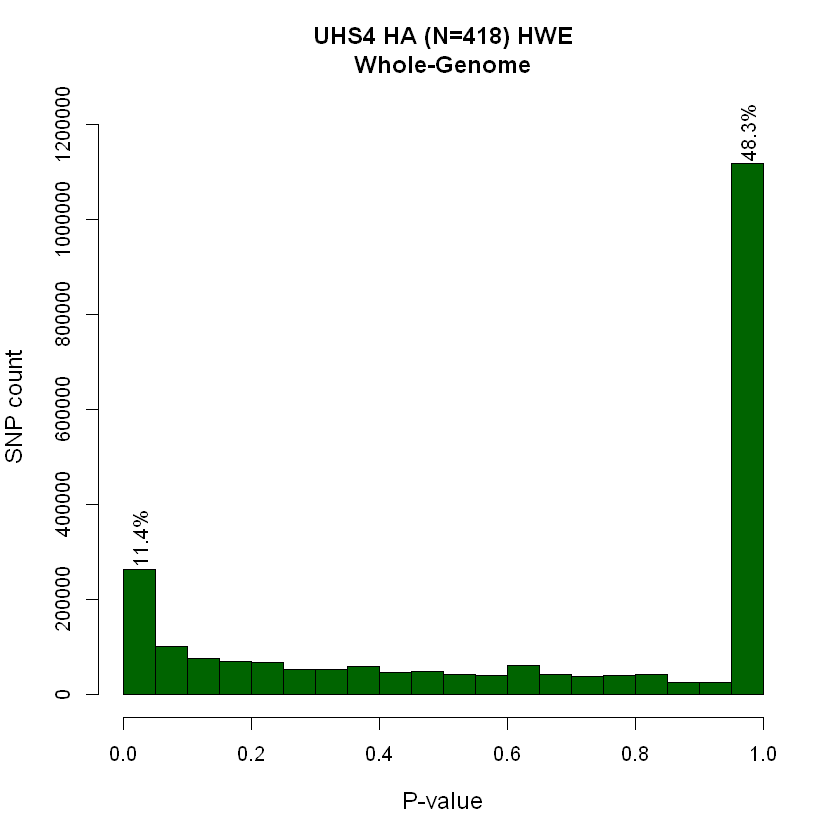

In [2]:
## R ##
setwd("C:/Users/jmarks/OneDrive - Research Triangle Institute/Projects/heroin/ngc/uhs4/qc/troubleshoot/ha/hwe")
df <- read.table("ha-all.hwe", header=T)
mytitle <- "UHS4 HA (N=418) HWE\nWhole-Genome"
hwe_hist(df, col = "dark green", title = mytitle)

#### Filters applied
We want to apply additional filters of MAF < 1% and GCR 10% to the data. See the discussion on [GitHub Issue 117](https://github.com/RTIInternational/bioinformatics/issues/117#issuecomment-480884610). 

In [ ]:
## EC2 ##
ancestry=ha
baseD=/shared/jmarks/heroin/uhs4/genotype/observed/processing/005/troubleshoot/hwe/$ancestry/002
genoD=/shared/jmarks/heroin/uhs4/genotype/observed/processing/005/$ancestry/autosomes

ln -s $genoD/genotypes_b37_dbsnp138_flipped.* $baseD

#================================================================================
# apply filters MAF 1%, GCR 10%, and HWE 0.0001.
/shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
    --noweb \
    --memory 2048 \
    --bfile $baseD/genotypes_b37_dbsnp138_flipped \
    --geno  0.1 \
    --hwe 0.0001 \
    --maf 0.01 \
    --make-bed \
    --out $baseD/$ancestry-all-maf_0.01-gcr_0.1-hwe_0.0001

"""
418 people (318 males, 100 females) loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 418 founders and 0 nonfounders present.
Calculating allele frequencies... done.
Total genotyping rate is 0.953367.
276447 variants removed due to missing genotype data (--geno).
--hwe: 12330 variants removed due to Hardy-Weinberg exact test.
693512 variants removed due to minor allele threshold(s)
(--maf/--max-maf/--mac/--max-mac).

1329311 variants and 418 people pass filters and QC.
"""

# apply filters MAF 1% and GCR 10%
/shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
    --noweb \
    --memory 2048 \
    --bfile $baseD/genotypes_b37_dbsnp138_flipped \
    --maf 0.01 \
    --geno  0.1 \
    --make-bed \
    --out $baseD/$ancestry-all-maf_0.01-gcr_0.1

"""
276447 variants removed due to missing genotype data (--geno).
693852 variants removed due to minor allele threshold(s)
(--maf/--max-maf/--mac/--max-mac).
1341301 variants and 418 people pass filters and QC.
"""
#================================================================================


# get genomewide HWE stats
/shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
    --noweb \
    --memory 2048 \
    --bfile $baseD/$ancestry-all-maf_0.01-gcr_0.1-hwe_0.0001 \
    --hardy \
    --out $baseD/$ancestry-all-maf_0.01-gcr_0.1-hwe_0.0001 \

/shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
    --noweb \
    --memory 2048 \
    --bfile $baseD/$ancestry-all-maf_0.01-gcr_0.1 \
    --hardy \
    --out $baseD/$ancestry-all-maf_0.01-gcr_0.1


#================================================================================
## local ##
cd /cygdrive/c/Users/jmarks/Desktop/Projects/heroin/ngc/uhs4/qc/troubleshoot/ha/hwe
scp -i ~/.ssh/gwas_rsa ec2-user@34.206.166.72:/shared/jmarks/heroin/uhs4/genotype/observed/processing/005/troubleshoot/hwe/ha/002/ha-all-maf_0.01-gcr_0.1-hwe_0.0001.hwe . &
scp -i ~/.ssh/gwas_rsa ec2-user@34.206.166.72:/shared/jmarks/heroin/uhs4/genotype/observed/processing/005/troubleshoot/hwe/ha/002/ha-all-maf_0.01-gcr_0.1.hwe . &


[1] 1341301

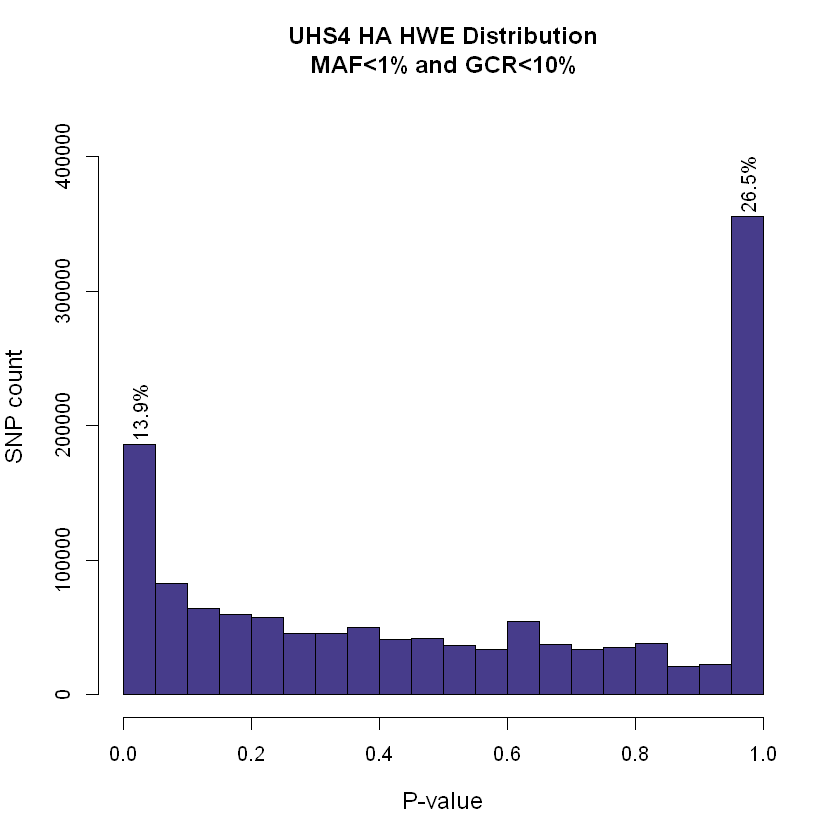

In [81]:
setwd("C:/Users/jmarks/OneDrive - Research Triangle Institute/Projects/heroin/ngc/uhs4/qc/troubleshoot/ha/hwe/")
#df <- read.table("ha-all-maf_0.01-gcr_0.1.hwe", header=T)

length(df$CHR)
mytitle <- "UHS4 HA HWE Distribution\nMAF<1% and GCR<10%"
hwe_hist(df, col = "slateblue4", title = mytitle, ylim=1.2, label_loc = 24000)

[1] 1329311

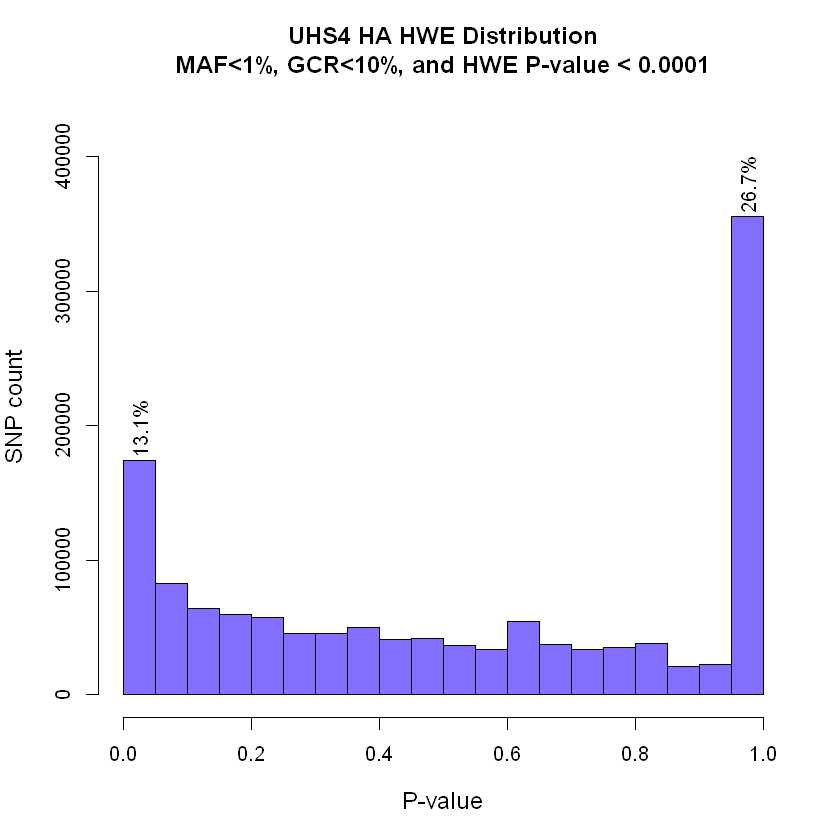

In [82]:
setwd("C:/Users/jmarks/OneDrive - Research Triangle Institute/Projects/heroin/ngc/uhs4/qc/troubleshoot/ha/hwe/")
#df <- read.table("ha-all-maf_0.01-gcr_0.1-hwe_0.0001.hwe", header=T)

length(df$CHR)
mytitle <- "UHS4 HA HWE Distribution\nMAF<1%, GCR<10%, and HWE P-value < 0.0001"
hwe_hist(df, col = "slateblue1", title = mytitle, ylim=1.2, label_loc = 24000)

## HWE UHS23
### EA
These data were downloaded from `rti-heroin/ngc_uhs2_uhs3_fou/data/genotype/phased/ea/`

In [ ]:
baseD=/shared/jmarks/heroin/troubleshooting/uhs23/003
ancestry=ea

aws s3 cp s3://rti-heroin/ngc_uhs2_uhs3_fou/data/genotype/phased/ea/ea_for_phasing.bed.gz $baseD
aws s3 cp s3://rti-heroin/ngc_uhs2_uhs3_fou/data/genotype/phased/ea/ea_for_phasing.bim.gz $baseD
aws s3 cp s3://rti-heroin/ngc_uhs2_uhs3_fou/data/genotype/phased/ea/ea_for_phasing.fam.gz $baseD

#================================================================================
# apply filters MAF 1%, GCR 10%, and HWE 0.0001.
/shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
    --noweb \
    --memory 2048 \
    --bfile $baseD/${ancestry}_for_phasing \
    --geno 0.1 \
    --maf 0.01 \
    --hwe 0.0001 \
    --make-bed \
    --out $baseD/uhs23-$ancestry-all-maf_0.01-gcr_0.1-hwe_0.0001
"""
2177 variants removed due to missing genotype data (--geno).
Warning: --hwe observation counts vary by more than 10%, due to the X
chromosome.  You may want to use a less stringent --hwe p-value threshold for X
chromosome variants.
--hwe: 3838 variants removed due to Hardy-Weinberg exact test.
570464 variants removed due to minor allele threshold(s)
(--maf/--max-maf/--mac/--max-mac).

918441 variants and 896 people pass filters and QC.
"""

# apply filters MAF 1% and GCR 10%
/shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
    --noweb \
    --memory 2048 \
    --bfile $baseD/${ancestry}_for_phasing \
    --geno 0.1 \
    --maf 0.01 \
    --make-bed \
    --out $baseD/uhs23-$ancestry-all-maf_0.01-gcr_0.1
"""
2177 variants removed due to missing genotype data (--geno).
570582 variants removed due to minor allele threshold(s)
(--maf/--max-maf/--mac/--max-mac).

922161 variants and 896 people pass filters and QC.
"""
#================================================================================


# get genomewide HWE stats
/shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
    --noweb \
    --memory 2048 \
    --bfile $baseD/uhs23-$ancestry-all-maf_0.01-gcr_0.1-hwe_0.0001 \
    --hardy \
    --out $baseD/uhs23-$ancestry-all-maf_0.01-gcr_0.1-hwe_0.0001 \

/shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
    --noweb \
    --memory 2048 \
    --bfile $baseD/uhs23-$ancestry-all-maf_0.01-gcr_0.1 \
    --hardy \
    --out $baseD/uhs23-$ancestry-all-maf_0.01-gcr_0.1


#================================================================================
## local ##
cd /cygdrive/c/Users/jmarks/Desktop/Projects/heroin/ngc/uhs4/qc/troubleshoot/uhs23/hwe/ea
scp -i ~/.ssh/gwas_rsa ec2-user@34.206.166.72:/shared/jmarks/heroin/troubleshooting/uhs23/003/uhs23-ea-all-maf_0.01-gcr_0.1-hwe_0.0001.hwe . &
scp -i ~/.ssh/gwas_rsa ec2-user@34.206.166.72:/shared/jmarks/heroin/troubleshooting/uhs23/003/uhs23-ea-all-maf_0.01-gcr_0.1.hwe . &

[1] 922161

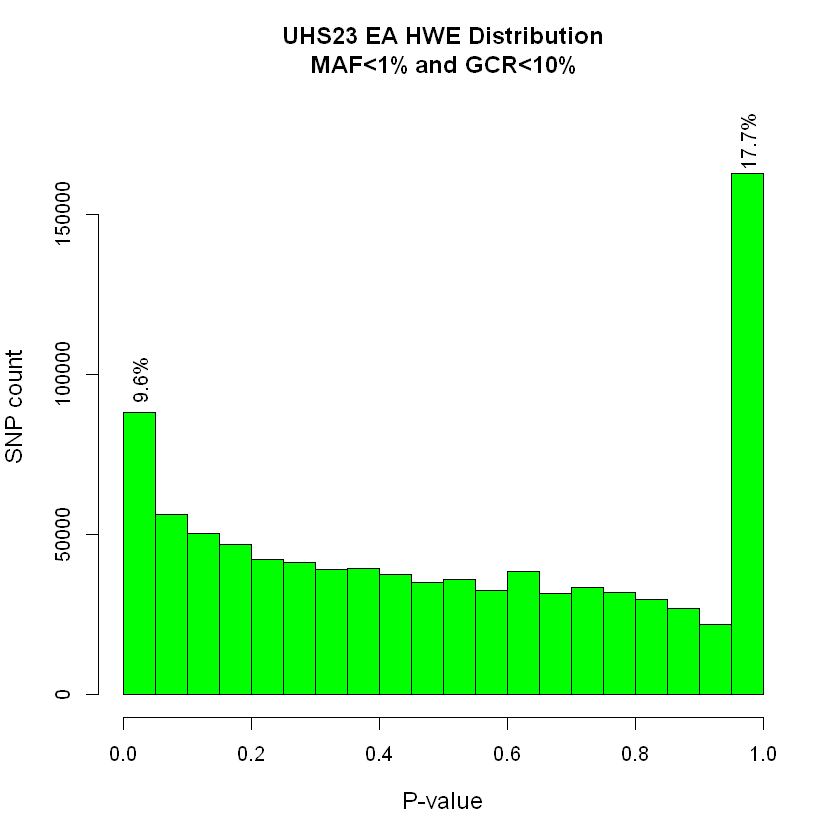

In [47]:
setwd("C:/Users/jmarks/OneDrive - Research Triangle Institute/Projects/heroin/ngc/uhs4/qc/troubleshoot/uhs23//hwe//ea/")
df <- read.table("uhs23-ea-all-maf_0.01-gcr_0.1.hwe", header=T)

length(df$CHR)
mytitle <- "UHS23 EA HWE Distribution\nMAF<1% and GCR<10%"
hwe_hist(df, col = "green", title = mytitle, ylim=1.1, label_loc = 10000)

[1] 922161

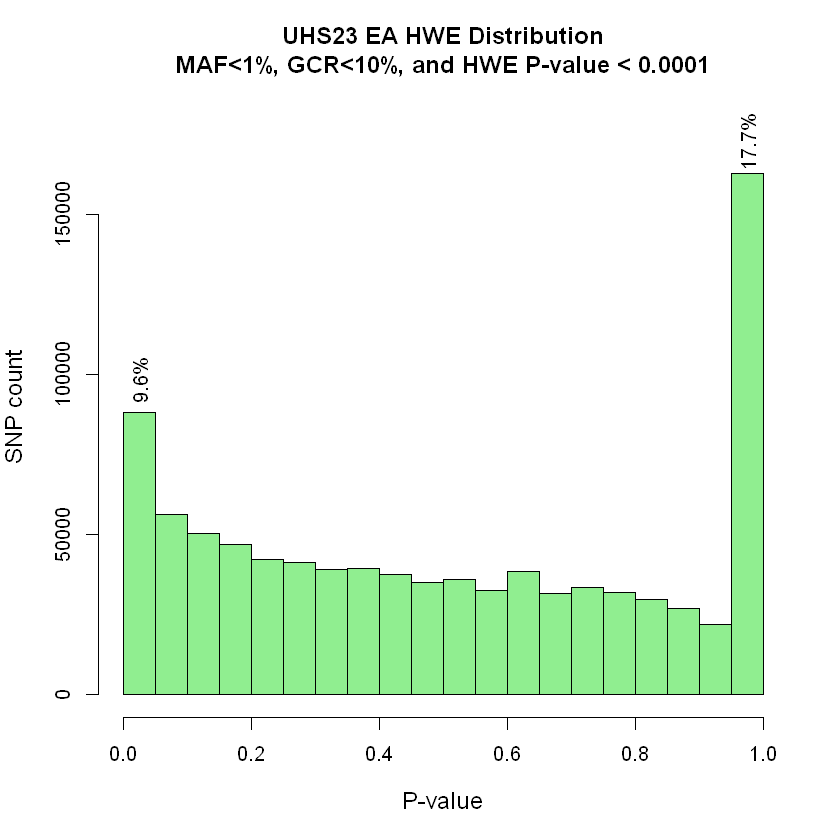

In [46]:
setwd("C:/Users/jmarks/OneDrive - Research Triangle Institute/Projects/heroin/ngc/uhs4/qc/troubleshoot/uhs23//hwe//ea/")
#df <- read.table("uhs23-ea-all-maf_0.01-gcr_0.1.hwe", header=T)

length(df$CHR)
mytitle <- "UHS23 EA HWE Distribution\nMAF<1%, GCR<10%, and HWE P-value < 0.0001"
hwe_hist(df, col = "light green", title = mytitle, ylim=1.1, label_loc = 10000)

### AA

In [ ]:
baseD=/shared/jmarks/heroin/troubleshooting/uhs23/003
ancestry=aa

aws s3 cp s3://rti-heroin/ngc_uhs2_uhs3_fou/data/genotype/phased/aa/aa_for_phasing.bed.gz $baseD
aws s3 cp s3://rti-heroin/ngc_uhs2_uhs3_fou/data/genotype/phased/aa/aa_for_phasing.bim.gz $baseD
aws s3 cp s3://rti-heroin/ngc_uhs2_uhs3_fou/data/genotype/phased/aa/aa_for_phasing.fam.gz $baseD

#================================================================================
# apply filters MAF 1%, GCR 10%, and HWE 0.0001.
/shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
    --noweb \
    --memory 2048 \
    --bfile $baseD/${ancestry}_for_phasing \
    --geno 0.1 \
    --maf 0.01 \
    --hwe 0.0001 \
    --make-bed \
    --out $baseD/uhs23-$ancestry-all-maf_0.01-gcr_0.1-hwe_0.0001
"""
2604 variants removed due to missing genotype data (--geno).
Warning: --hwe observation counts vary by more than 10%, due to the X
chromosome.  You may want to use a less stringent --hwe p-value threshold for X
chromosome variants.
--hwe: 4518 variants removed due to Hardy-Weinberg exact test.
157033 variants removed due to minor allele threshold(s)
(--maf/--max-maf/--mac/--max-mac).

1059304 variants and 915 people pass filters and QC.
"""

# apply filters MAF 1% and GCR 10%
/shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
    --noweb \
    --memory 2048 \
    --bfile $baseD/${ancestry}_for_phasing \
    --geno 0.1 \
    --maf 0.01 \
    --make-bed \
    --out $baseD/uhs23-$ancestry-all-maf_0.01-gcr_0.1
"""
2604 variants removed due to missing genotype data (--geno).
157325 variants removed due to minor allele threshold(s)
(--maf/--max-maf/--mac/--max-mac).

1063530 variants and 915 people pass filters and QC.
"""
#================================================================================


# get genomewide HWE stats
/shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
    --noweb \
    --memory 2048 \
    --bfile $baseD/uhs23-$ancestry-all-maf_0.01-gcr_0.1-hwe_0.0001 \
    --hardy \
    --out $baseD/uhs23-$ancestry-all-maf_0.01-gcr_0.1-hwe_0.0001 \

/shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
    --noweb \
    --memory 2048 \
    --bfile $baseD/uhs23-$ancestry-all-maf_0.01-gcr_0.1 \
    --hardy \
    --out $baseD/uhs23-$ancestry-all-maf_0.01-gcr_0.1


#================================================================================
## local ##
cd /cygdrive/c/Users/jmarks/Desktop/Projects/heroin/ngc/uhs4/qc/troubleshoot/uhs23/hwe/aa
scp -i ~/.ssh/gwas_rsa ec2-user@34.206.166.72:/shared/jmarks/heroin/troubleshooting/uhs23/003/uhs23-aa-all-maf_0.01-gcr_0.1-hwe_0.0001.hwe . &
scp -i ~/.ssh/gwas_rsa ec2-user@34.206.166.72:/shared/jmarks/heroin/troubleshooting/uhs23/003/uhs23-aa-all-maf_0.01-gcr_0.1.hwe . &

[1] 1063530

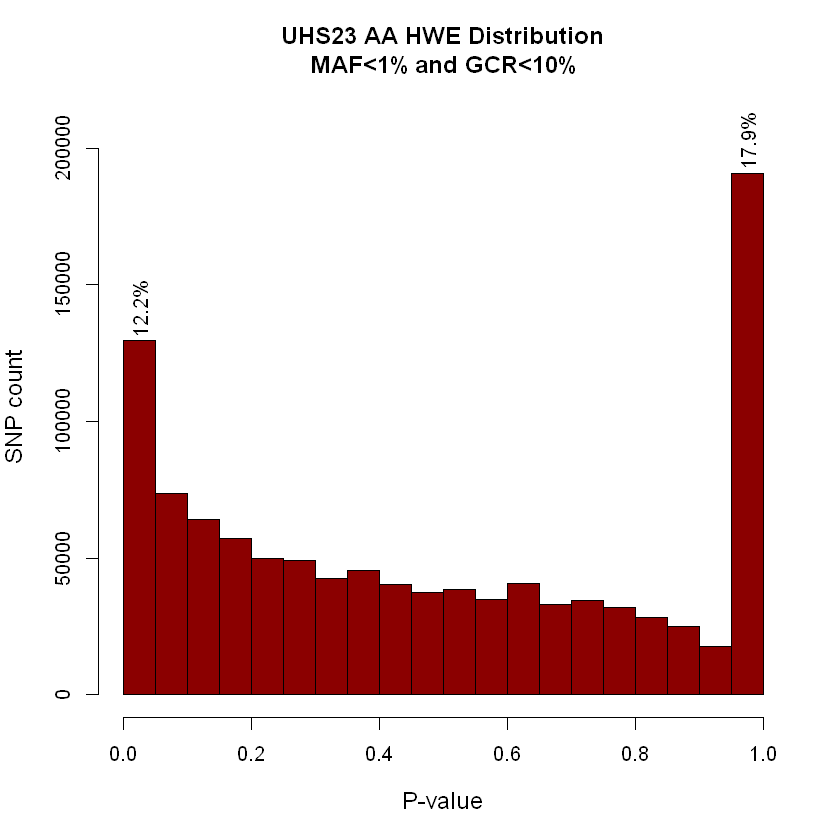

In [55]:
setwd("C:/Users/jmarks/OneDrive - Research Triangle Institute/Projects/heroin/ngc/uhs4/qc/troubleshoot/uhs23//hwe//aa/")
#df <- read.table("uhs23-aa-all-maf_0.01-gcr_0.1.hwe", header=T)

length(df$CHR)
mytitle <- "UHS23 AA HWE Distribution\nMAF<1% and GCR<10%"
hwe_hist(df, col = "red4", title = mytitle, ylim=1.1, label_loc = 12000)

[1] 1059304

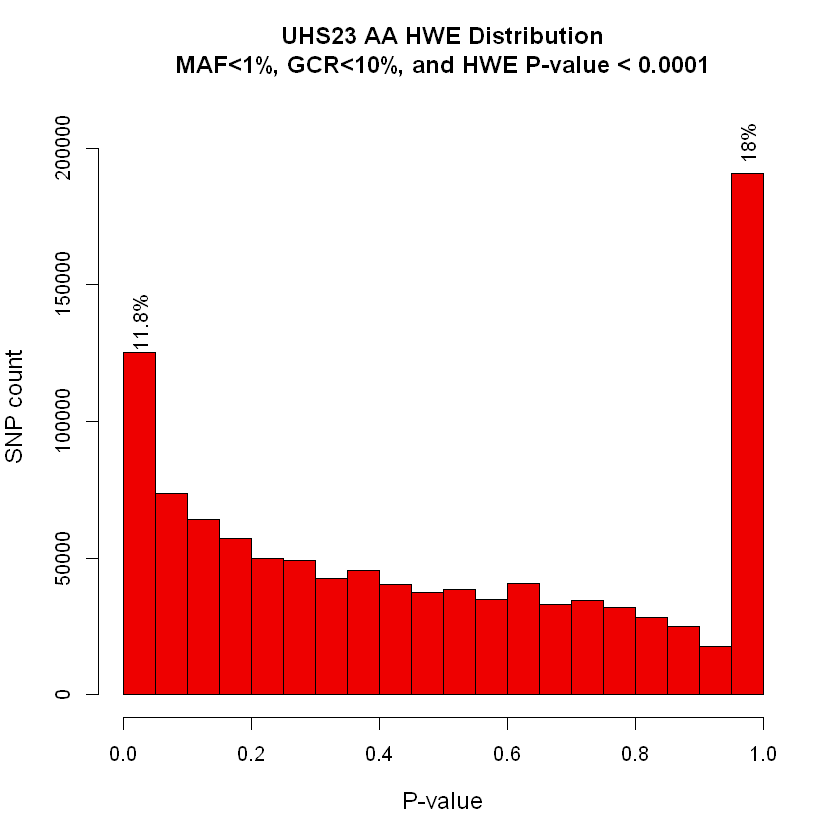

In [62]:
setwd("C:/Users/jmarks/OneDrive - Research Triangle Institute/Projects/heroin/ngc/uhs4/qc/troubleshoot/uhs23//hwe//aa/")
#df <- read.table("uhs23-aa-all-maf_0.01-gcr_0.1-hwe_0.0001.hwe", header=T)

length(df$CHR)
mytitle <- "UHS23 AA HWE Distribution\nMAF<1%, GCR<10%, and HWE P-value < 0.0001"
hwe_hist(df, col = "red2", title = mytitle, ylim=1.1, label_loc = 11000)

# GCR
We are going to check the genotype call rate for the subjects directly post structure.

In [ ]:
cd /shared/jmarks/heroin/uhs4/genotype/observed/processing/004/troubleshoot/gcr
ln -s ../../ea/autosomes/genotypes_b37_dbsnp138_flipped.* .
ww *
   1179093 genotypes_b37_dbsnp138_flipped.bed
   2311600 genotypes_b37_dbsnp138_flipped.bim
      1650 genotypes_b37_dbsnp138_flipped.fam


ancestry=ea
gcr=0.03
echo -e "\n\n================ ${ancestry} ================\n\n"
/shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
    --noweb \
    --bfile genotypes_b37_dbsnp138_flipped \
    --mind ${gcr} \
    --make-bed \
    --out test.gcr${gcr}.filter

wc -l test.gcr${gcr}.filter.fam


/shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
    --noweb \
    --bfile genotypes_b37_dbsnp138_flipped \
    --missing \
    --make-bed \
    --out test.missing.filter

FID,IID,MISS_PHENO,N_MISS,N_GENO,F_MISS
AS00-00584_8002022306_HHG10079_12_A07,AS00-00584_8002022306_HHG10079_12_A07,Y,53422,2311600,0.02311
AS00-00619_8002160856_HHG0001_10_G01,AS00-00619_8002160856_HHG0001_10_G01,Y,85979,2311600,0.03719
AS00-00631_8002022318_HHG10080_15_D03,AS00-00631_8002022318_HHG10080_15_D03,Y,456462,2311600,0.19750
AS00-00636_8002022330_HHG10081_12_B07,AS00-00636_8002022330_HHG10081_12_B07,Y,54050,2311600,0.02338
AS00-00672_8002022247_HHG10082_11_E10,AS00-00672_8002022247_HHG10082_11_E10,Y,143693,2311600,0.06216
AS00-00675_8002022259_HHG10083_37_D08,AS00-00675_8002022259_HHG10083_37_D08,Y,111602,2311600,0.04828


[1] 0

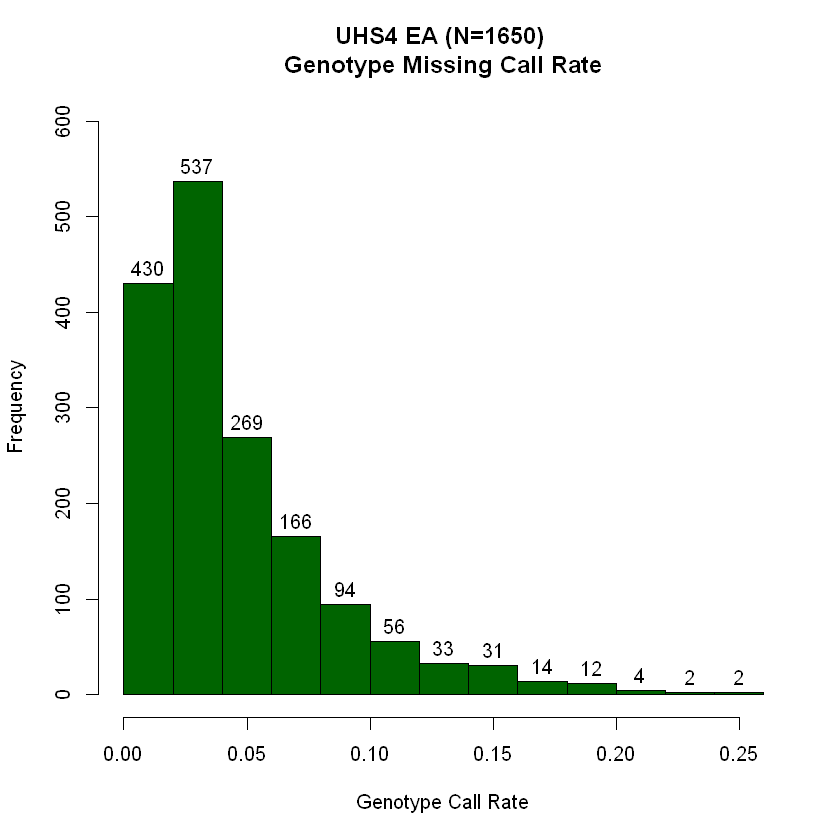

In [31]:
# R #
setwd("C:/Users/jmarks/OneDrive - Research Triangle Institute/Projects/heroin/ngc/uhs4/qc/troubleshoot/ea/gcr")
uhs4_ea <- read.table("test.missing.filter.imiss", header=T)

head(uhs4_ea)
length(uhs4_ea$study_maf)
x = hist(uhs4_ea$F_MISS, main="UHS4 EA (N=1650) \nGenotype Missing Call Rate",
        ylim=c(0,600),
        col="dark green",
        xlab="Genotype Call Rate",
        labels=TRUE)




# Plate identification
Want to take the EA subjects that failed IBS filtering and search for them in the QC information for smokescreen and heroin subsets and determine if there is a specific chip or plate that is enriched for these subjects.

V1,V2
AS97-06495_8002688755_HHG3319_18_C10,AS97-06495_8002688755_HHG3319_18_C10
AS99-14080_8002694956_HHG0602_1_C01,AS99-14080_8002694956_HHG0602_1_C01
AS96-06433_8002025120_HHG9651_37_A06,AS96-06433_8002025120_HHG9651_37_A06
AS00-12786_8002022968_HHG10190_12_F02,AS00-12786_8002022968_HHG10190_12_F02
AS91-1702_8001962452_HHG9860_26_G03,AS91-1702_8001962452_HHG9860_26_G03
AS92-3195_8002690083_HHG7094_31_C04,AS92-3195_8002690083_HHG7094_31_C04


ï..Index,Sample.ID,Plate.Barcode,POSITION,Inventory.Code,Plate..,RUID,Subject.Code,Concentration..ng.ul.,Volume..ul.,...,Gender,p05.Grn,p50.Grn,p95.Grn,p05.Red,p50.Red,p95.Red,p10.GC,p50.GC,Failure_Reason
1,AS02-07794_8002025078_HHG9597_11_A01,7000153955,A01,8002025078,11,HHG9597,AS02-07794,1,50,...,Male,213,2512,5958,385,2312,11494,0.4097278,0.6280699,
2,AS02-05597_8002025207_HHG9770_11_B01,7000153955,B01,8002025207,11,HHG9770,AS02-05597,1,50,...,Female,225,2531,6496,384,2087,12117,0.4062940,0.6273716,
3,AS02-08124_8002025031_HHG9602_11_C01,7000153955,C01,8002025031,11,HHG9602,AS02-08124,1,50,...,Male,245,2041,7545,378,1490,13550,0.3702527,0.6206864,
4,AS02-07563_8002025113_HHG9592_11_D01,7000153955,D01,8002025113,11,HHG9592,AS02-07563,1,50,...,Male,303,2962,7842,455,2138,13580,0.4027762,0.6270627,
5,AS01-15519_8002025598_HHG9730_11_E01,7000153955,E01,8002025598,11,HHG9730,AS01-15519,1,50,...,Male,331,3605,8399,493,2597,14285,0.4126916,0.6288362,
6,AS02-00884_8002025170_HHG9758_11_F01,7000153955,F01,8002025170,11,HHG9758,AS02-00884,1,50,...,Female,371,4002,9124,539,2888,14935,0.4115804,0.6283222,


ï..Index,Sample.ID,Plate.Barcode,POSITION,Inventory.Code,Plate..,RUID,Subject.Code,Concentration..ng.ul.,Volume..ul.,...,p05.Grn,p50.Grn,p95.Grn,p05.Red,p50.Red,p95.Red,p10.GC,p50.GC,Array.Info.Sentrix.ID,Array.Info.Sentrix.Position
1,AS00-12448_8002697168_HHG0960_1_A01,8000177628,A01,8002697168,1,HHG0960,AS00-12448,1,50,...,191,1955,5467,447,2187,14371,0.3813254,0.6223569,202662350030,R01C01
2,AS00-12449_8002697180_HHG0961_1_B01,8000177628,B01,8002697180,1,HHG0961,AS00-12449,1,50,...,197,2003,6032,452,2460,14978,0.3271232,0.6067064,202662350030,R02C01
3,AS99-14080_8002694956_HHG0602_1_C01,8000177628,C01,8002694956,1,HHG0602,AS99-14080,1,50,...,224,2561,6218,518,3042,15471,0.3546011,0.6138282,202662350030,R03C01
4,AS00-00458_8002694957_HHG0612_1_D01,8000177628,D01,8002694957,1,HHG0612,AS00-00458,1,50,...,245,2744,6772,536,3197,15645,0.3436159,0.6112983,202662350030,R04C01
5,AS00-00586_8002694993_HHG0616_1_E01,8000177628,E01,8002694993,1,HHG0616,AS00-00586,1,50,...,275,2611,7803,524,2145,16256,0.3690195,0.6198461,202662350030,R05C01
6,AS00-00614_8002695005_HHG0617_1_F01,8000177628,F01,8002695005,1,HHG0617,AS00-00614,1,50,...,336,3100,8387,619,2631,16813,0.3849658,0.6237382,202662350030,R06C01


[1] 460

[1] 426

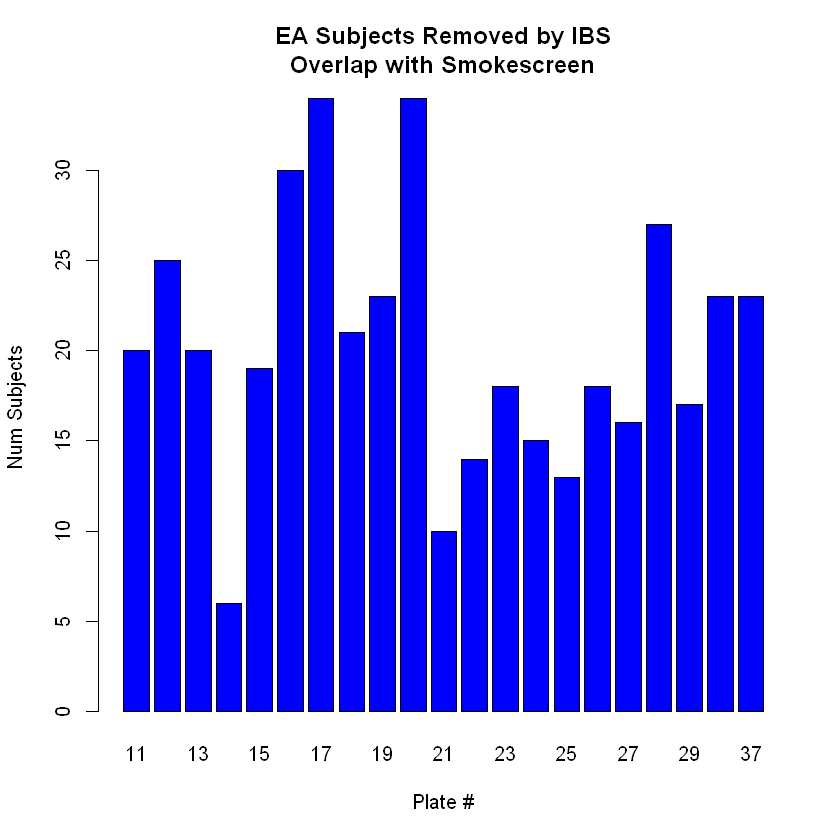

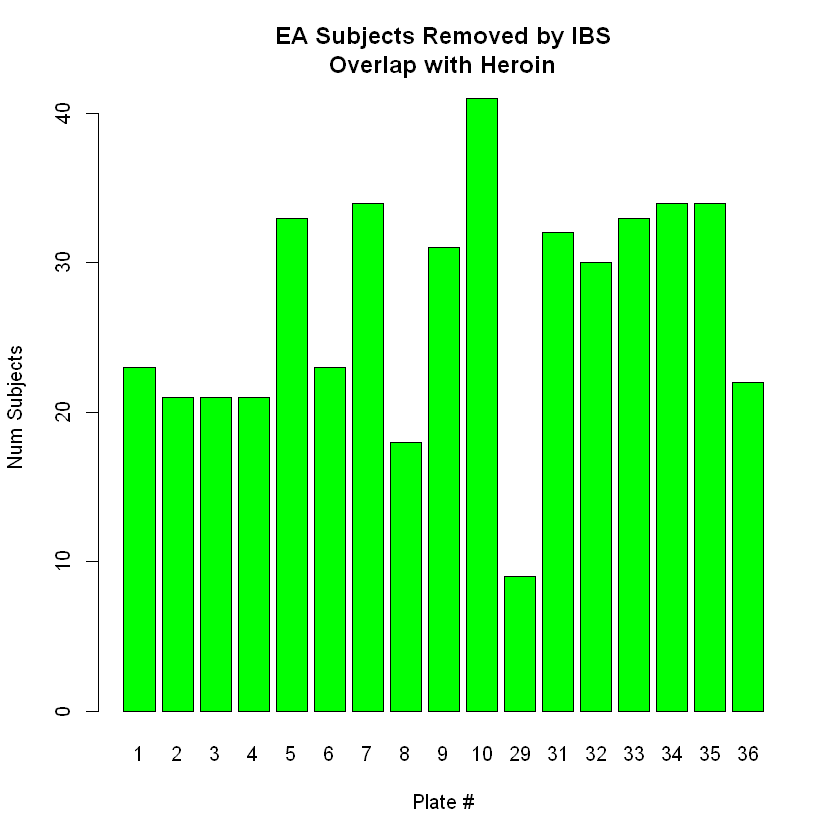

In [58]:
setwd("/Users//jmarks//OneDrive - Research Triangle Institute//Projects//heroin/ngc/uhs4/qc/troubleshoot/ea/chip_detection/")
geno_ids <- read.table("genotypes_for_relatedness_ld_prune_ibs_gt_0.9_igraph.remove", header=F)
smokescreen_df <- read.csv("Eric_Johnson_Omni2.5_Smokescreen_Subset_QC_Report_20190213.csv", header=T)
heroin_df <- read.csv("Eric_Johnson_Omni2-5_Heroin_Subset_QC_Report_20190128.csv")

head(geno_ids)
head(smokescreen_df)
head(heroin_df)

smoke_overlap <- smokescreen_df[smokescreen_df$Sample.ID %in% geno_ids$V1,]
heroin_overlap <- heroin_df[heroin_df$Sample.ID %in% geno_ids$V1,]
length(heroin_overlap$ï..Index)
length(smoke_overlap$ï..Index)

barplot(table(smoke_overlap$Plate..), main="EA Subjects Removed by IBS\nOverlap with Smokescreen",
       xlab="Plate #",
        ylab="Num Subjects",
       col="blue")
barplot(table(heroin_overlap$Plate..), main="EA Subjects Removed by IBS\nOverlap with Heroin",
       xlab="Plate #",
        ylab="Num Subjects",
       col="green")

# Sandbox


In [ ]:
/shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
    --noweb \
    --memory 5000 \
    --bfile /shared/jmarks/heroin/uhs4/genotype/observed/processing/004/ea/genotypes_b37_dbsnp138 \
    --chr {1..23},25 \
    --make-bed \
    --out uhs4.EA.structure.unmerged

# Combine split chrX and PARs
/shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
    --noweb \
    --memory 5000 \
    --bfile uhs4.EA.structure.unmerged \
    --merge-x \
    --make-bed \
    --out uhs4.EA.structure


/shared/bioinformatics/software/scripts/qsub_job.sh \
    --job_name ${ancestry}_${chr}_ld_prune \
    --script_prefix ${ancestry}_${chr}_ld_prune \
    --mem 3.5 \
    --priority 0 \
    --program

### EA HWE chr22

N=886
The subjects removed due to IBS.

In [ ]:
myea=/shared/jmarks/heroin/uhs4/genotype/observed/processing/004/troubleshoot/ea/001
thou=/shared/data/ref_panels/1000G/2014.10

# get counts of post 
ww $myea/*{bim,fam}
"""
 2311600 genotypes_b37_dbsnp138_flipped.bim
    1650 genotypes_b37_dbsnp138_flipped.fam
"""

# filter down to only problematic subjects
/shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
    --noweb \
    --memory 2048 \
    --bfile $myea/genotypes_b37_dbsnp138_flipped \
    --keep $myea/genotypes_for_relatedness_ld_prune_ibs_gt_0.9_igraph.remove \
    --freq \
    --hardy \
    --chr 22 \
    --out $myea/chr22_ea_keep_problematic_n886

# extract 1000G chr22 eur maf
#================================================================================
python
"""
Extract variants that have rsIDs along with their eur maf. 

"""

import gzip

anc = "EUR"
infile = "/shared/data/ref_panels/1000G/2014.10/1000GP_Phase3_chr22.legend.gz"
outfile = "/shared/jmarks/heroin/uhs4/genotype/observed/processing/004/troubleshoot/ea/1000g/1000g_eur_chr22_maf"

with gzip.open(infile) as inF, open(outfile, "w") as outF:
    head = inF.readline()
    head = head.split()
    maf_index = head.index(anc)
    head = "{}\t{}\n".format(head[0], head[maf_index])
    line = inF.readline()
    while line:
        sl = line.split()
        maf = float(sl[maf_index])
        whole_id = sl[0]
        rsid = whole_id.split(":")[0]
        
        if rsid[0:2] == "rs":
            if maf > 0.5:
                maf = 1 - maf
            newline = "{}\t{}\t{}\n".format(rsid, whole_id, maf)
            outF.write(newline)
        line = inF.readline()
#================================================================================
## filter to biallelic variants
cut -f1 $myea/1000g/1000g_eur_chr22_maf  | sort | uniq -u > $myea/1000g/biallelic_only
awk 'FNR==NR{map[$1]=1; next} $1 in map {print $1,$3} ' \
    $myea/1000g/biallelic_only $myea/1000g/1000g_eur_chr22_maf > $myea/1000g/1000g_eur_chr22_bionly.maf


# get study/1000G overlap
awk 'FNR==NR{map[$1]=$2; next} $2 in map {print $2,$5,map[$2]} FNR==1{print "id\tstudy_maf\tthoug_maf"} ' \
 $myea/1000g/1000g_eur_chr22_bionly.maf $myea/chr22_ea_keep_problematic_n886.frq > \
    $myea/study_1000g_overlap_chr22_n886_frq

# scp from ec2 to local
cd ~/Desktop/Projects/heroin/ngc/uhs4/qc/troubleshoot/ea/maf
scp -i ~/.ssh/gwas_rsa ec2-user@34.206.166.72:/shared/jmarks/heroin/uhs4/genotype/observed/processing/004/troubleshoot/ea/study_1000g_overlap_chr22_n764.frq .


CHR,SNP,TEST,A1,A2,GENO,O.HET.,E.HET.,P
22,rs12157537,ALL(NP),A,G,0/0/873,0.000000,0.000000,1
22,rs199557366,ALL(NP),A,C,0/1/885,0.001129,0.001128,1
22,rs4145526,ALL(NP),C,A,0/1/885,0.001129,0.001128,1
22,rs4321465,ALL(NP),A,G,0/0/883,0.000000,0.000000,1
22,rs4911642,ALL(NP),C,T,0/15/804,0.018320,0.018150,1
22,rs6010348,ALL(NP),G,A,0/5/867,0.005734,0.005718,1


[1] 33242

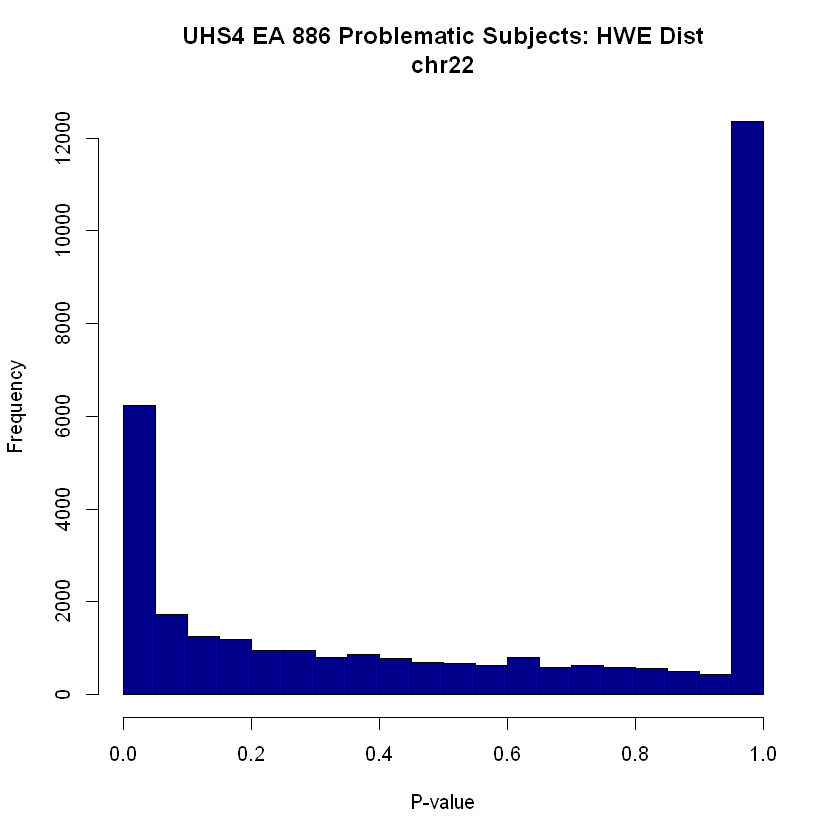

In [19]:
setwd("C:/Users/jmarks/OneDrive - Research Triangle Institute/Projects/heroin/ngc/uhs4/qc/troubleshoot/ea/hwe")
df <- read.table("chr22_ea_keep_problematic_n886.hwe", header=T)

head(df)
length(df$P)


hist(df$P, col="dark blue",
    main="UHS4 EA 886 Problematic Subjects: HWE Dist\nchr22",
    xlab="P-value")

#### N=1,650 

In [ ]:
myea=/shared/jmarks/heroin/uhs4/genotype/observed/processing/004/troubleshoot/ea/002
thou=/shared/data/ref_panels/1000G/2014.10

# get counts of post 
ww $myea/*{bim,fam}
"""
 2311600 genotypes_b37_dbsnp138_flipped.bim
    1650 genotypes_b37_dbsnp138_flipped.fam
"""

/shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
    --noweb \
    --memory 2048 \
    --bfile $myea/genotypes_b37_dbsnp138_flipped \
    --freq \
    --hardy \
    --chr 22 \
    --out $myea/chr22_ea_all_n1650

# filter down to only non-problematic subjects
/shared/bioinformatics/software/third_party/plink-1.90-beta-4.10-x86_64/plink \
    --noweb \
    --memory 2048 \
    --bfile $myea/genotypes_b37_dbsnp138_flipped \
    --remove $myea/genotypes_for_relatedness_ld_prune_ibs_gt_0.9_igraph.remove \
    --freq \
    --hardy \
    --chr 22 \
    --out $myea/chr22_ea_all_n764

CHR,SNP,TEST,A1,A2,GENO,O.HET.,E.HET.,P
22,rs12157537,ALL(NP),A,G,0/0/1612,0.0000000,0.0000000,1
22,rs199557366,ALL(NP),A,C,0/4/1644,0.0024270,0.0024240,1
22,rs4145526,ALL(NP),C,A,0/1/1649,0.0006061,0.0006059,1
22,rs4321465,ALL(NP),A,G,0/1/1644,0.0006079,0.0006077,1
22,rs4911642,ALL(NP),C,T,0/19/1518,0.0123600,0.0122900,1
22,rs6010348,ALL(NP),G,A,0/18/1598,0.0111400,0.0110800,1


[1] 33242

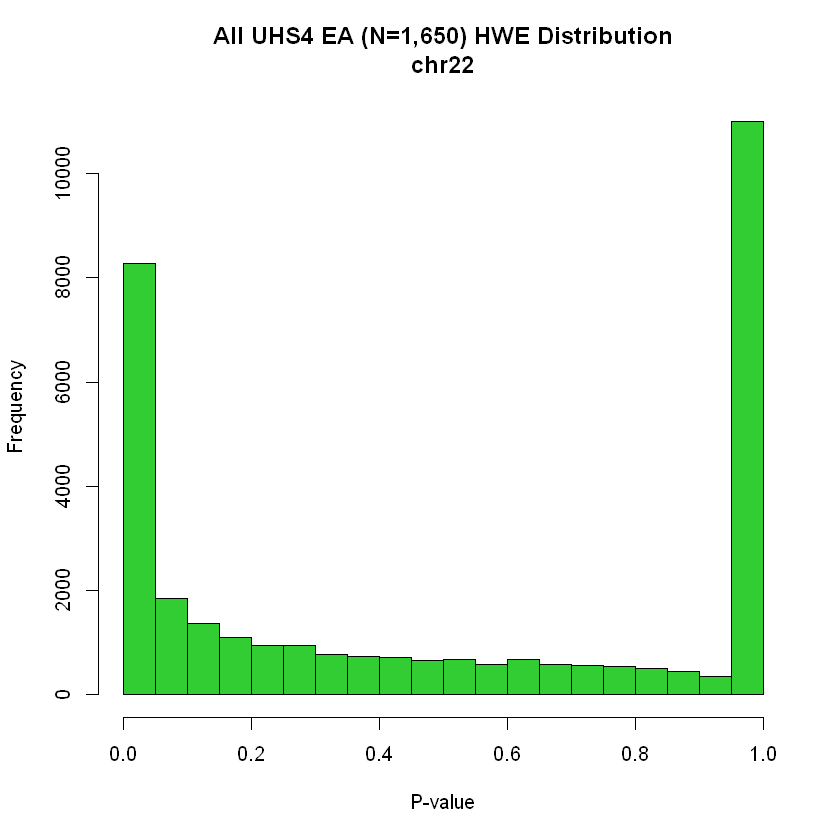

In [26]:
setwd("C:/Users/jmarks/OneDrive - Research Triangle Institute/Projects/heroin/ngc/uhs4/qc/troubleshoot/ea/hwe/")
df <- read.table("chr22_ea_all_n1650.hwe", header=T)

head(df)
length(df$P)


hist(df$P, col="lime green",
    main="All UHS4 EA (N=1,650) HWE Distribution\nchr22",
    xlab = "P-value")


#### N=764
Subjects not removed during the IBS filtering.

CHR,SNP,TEST,A1,A2,GENO,O.HET.,E.HET.,P
22,rs12157537,ALL(NP),A,G,0/0/739,0.000000,0.000000,1
22,rs199557366,ALL(NP),A,C,0/3/759,0.003937,0.003929,1
22,rs4145526,ALL(NP),C,A,0/0/764,0.000000,0.000000,1
22,rs4321465,ALL(NP),A,G,0/1/761,0.001312,0.001311,1
22,rs4911642,ALL(NP),C,T,0/4/714,0.005571,0.005556,1
22,rs6010348,ALL(NP),G,A,0/13/731,0.017470,0.017320,1


[1] 33242

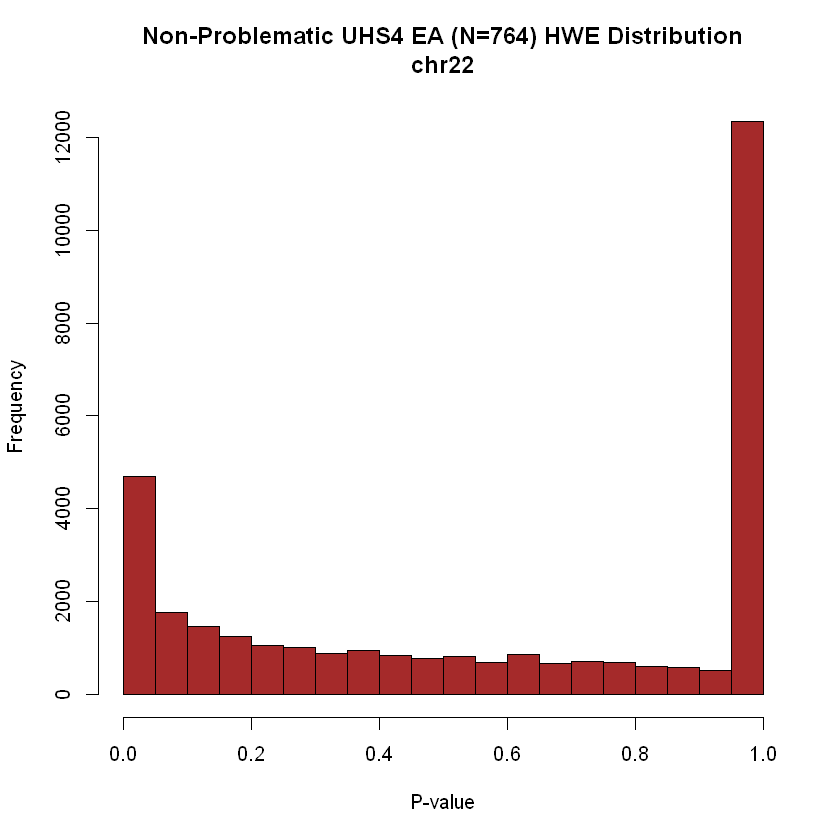

In [28]:
setwd("C:/Users/jmarks/OneDrive - Research Triangle Institute/Projects/heroin/ngc/uhs4/qc/troubleshoot/ea/hwe/")
df <- read.table("chr22_ea_all_n764.hwe", header=T)

head(df)
length(df$P)


hist(df$P, col="brown",
    main="Non-Problematic UHS4 EA (N=764) HWE Distribution\nchr22",
    xlab = "P-value")

CHR,SNP,TEST,A1,A2,GENO,O.HET.,E.HET.,P
22,22:16152031:A:C,ALL(NP),A,C,0/3/892,0.003352,0.003346,1.0000
22,rs56288446:16456970:G:A,ALL(NP),A,G,0/0/896,0.000000,0.000000,1.0000
22,rs201243271:16854778:C:T,ALL(NP),T,C,0/0/884,0.000000,0.000000,1.0000
22,rs5747010:16855618:G:A,ALL(NP),A,G,115/407/343,0.470500,0.465300,0.7703
22,rs114025703:16863045:T:C,ALL(NP),C,T,0/0/885,0.000000,0.000000,1.0000
22,22:16874056:C:T,ALL(NP),C,T,0/1/886,0.001127,0.001127,1.0000


[1] 20315

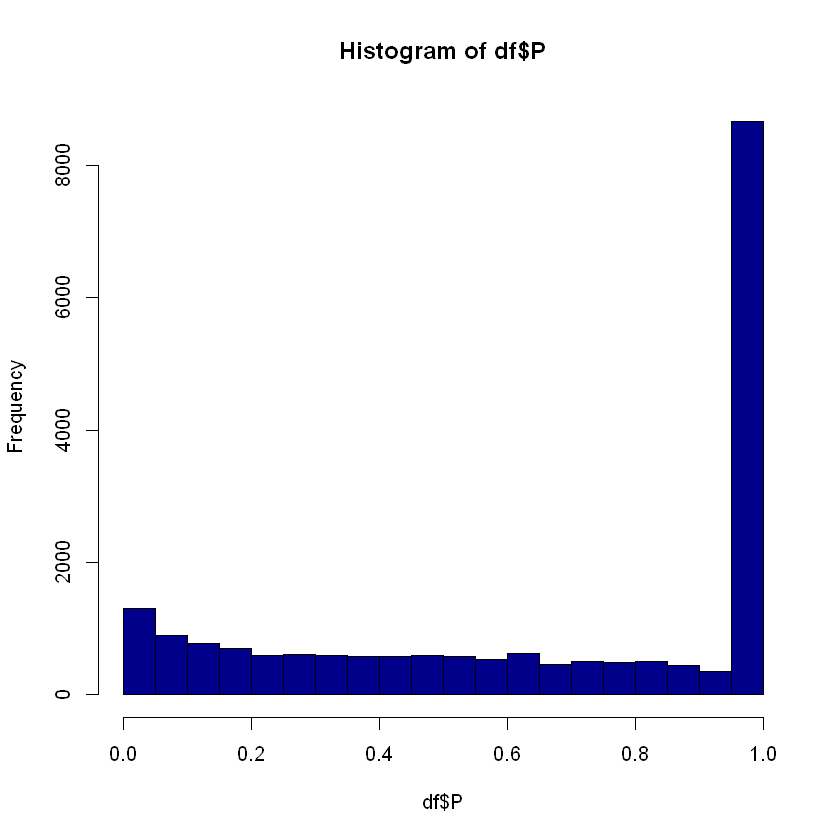

In [10]:
setwd("C:/Users/jmarks/OneDrive - Research Triangle Institute/Projects/heroin/ngc/uhs4/qc/troubleshoot/ea/hwe/uhs23")
df <- read.table("ea.uhs23.chr22.hwe", header=T)

head(df)
length(df$P)


hist(df$P, col="dark blue")
